<a href="https://colab.research.google.com/github/NithyaPKiran/Project---CO2-Emissions/blob/main/P389_CO2_EMISSIONS_FINAL_GROUP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("co2_emissions (1).csv")
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [ ]:
#Checking the last 5 records of the dataset
df.tail(5)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS,Z,12.2,8.7,10.7,26,248


In [ ]:
#checking for null values in the dataset
df.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [ ]:
#collecting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [ ]:
df.shape

(7385, 12)

In [ ]:
#use transpose for better understanding the describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_consumption_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_consumption_comb(l/100km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
fuel_consumption_comb(mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2_emissions,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [ ]:
df.describe(include = object)

,make,model,vehicle_class,transmission,fuel_type
count,7385,7385,7385,7385,7385
unique,42,2053,16,5,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS,X
freq,628,32,1217,3127,3637


In [ ]:
#checking duplicated values
df.duplicated().sum()

1112

In [ ]:
#dropping all duplicates values
df.drop_duplicates(inplace=True)

In [ ]:
len(df)

6273

In [ ]:
df.shape

(6273, 12)

In [ ]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
engine_size,6273.0,3.163000,1.365294,0.9,2.0,3.0,3.7,8.4
cylinders,6273.0,5.620596,1.846424,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city,6273.0,12.615591,3.550572,4.2,10.1,12.1,14.7,30.6
fuel_consumption_hwy,6273.0,9.073426,2.277893,4.0,7.5,8.7,10.3,20.6
fuel_consumption_comb(l/100km),6273.0,11.022111,2.945028,4.1,8.9,10.6,12.7,26.1
fuel_consumption_comb(mpg),6273.0,27.395026,7.225472,11.0,22.0,27.0,32.0,69.0
co2_emissions,6273.0,251.247250,59.235396,96.0,208.0,246.0,289.0,522.0


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
make,6273,42,FORD,575
model,6273,2053,F-150 FFV,32
vehicle_class,6273,16,SUV - SMALL,1004
transmission,6273,5,AS,2720
fuel_type,6273,5,X,3030


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [ ]:
## Correlation
data_corr_features = df.select_dtypes(include=np.number)
print("The numerical columns in dataset is ",data_corr_features.columns)

The numerical columns in dataset is  Index(['engine_size', 'cylinders', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')


In [ ]:
plt.figure(figsize=(20,10))
corr = data_corr_features.corr()
corr

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
engine_size,1.000000,0.928796,0.834325,0.766700,0.820183,-0.764060,0.854999
cylinders,0.928796,1.000000,0.801180,0.717321,0.780932,-0.724347,0.834697
fuel_consumption_city,0.834325,0.801180,1.000000,0.950733,0.994040,-0.927901,0.918528
fuel_consumption_hwy,0.766700,0.717321,0.950733,1.000000,0.978578,-0.892238,0.883153
fuel_consumption_comb(l/100km),0.820183,0.780932,0.994040,0.978578,1.000000,-0.926110,0.916611
fuel_consumption_comb(mpg),-0.764060,-0.724347,-0.927901,-0.892238,-0.926110,1.000000,-0.906839
co2_emissions,0.854999,0.834697,0.918528,0.883153,0.916611,-0.906839,1.000000


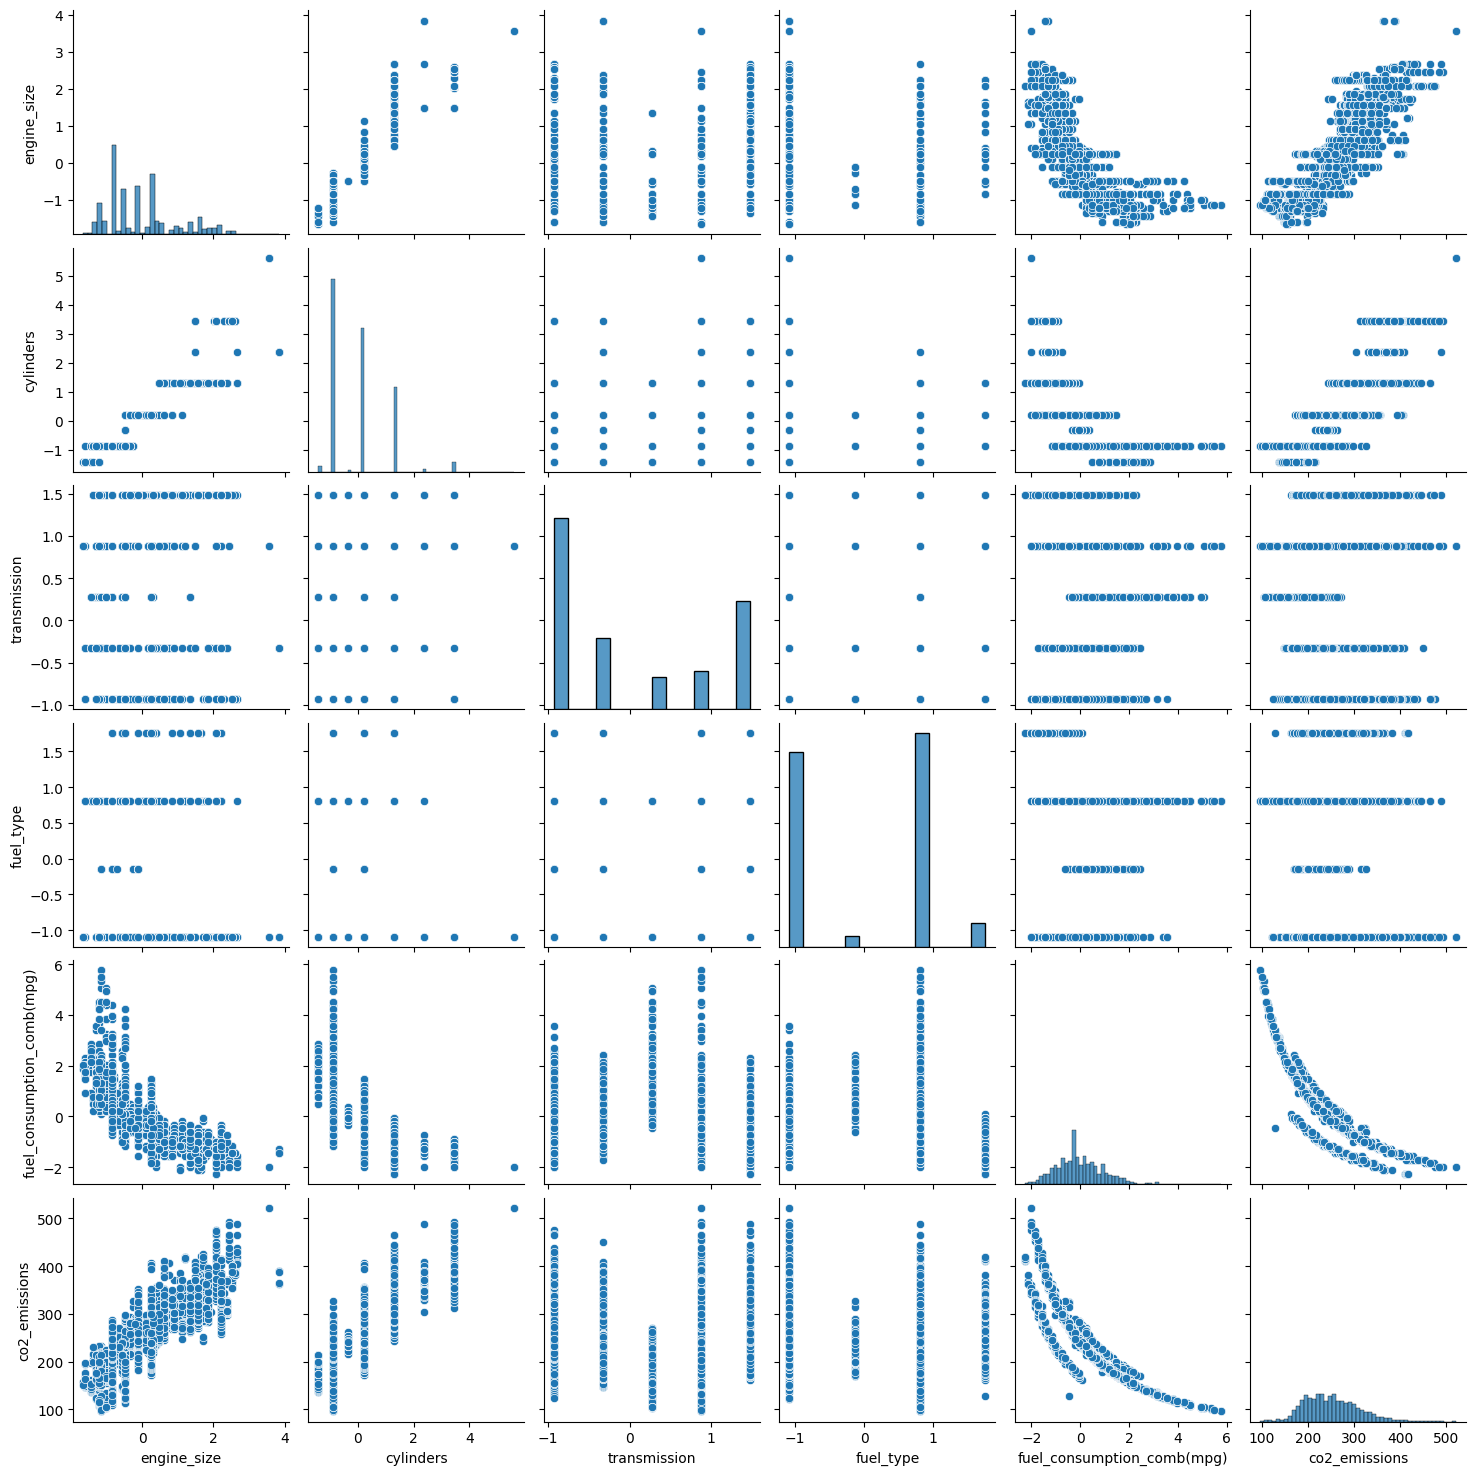

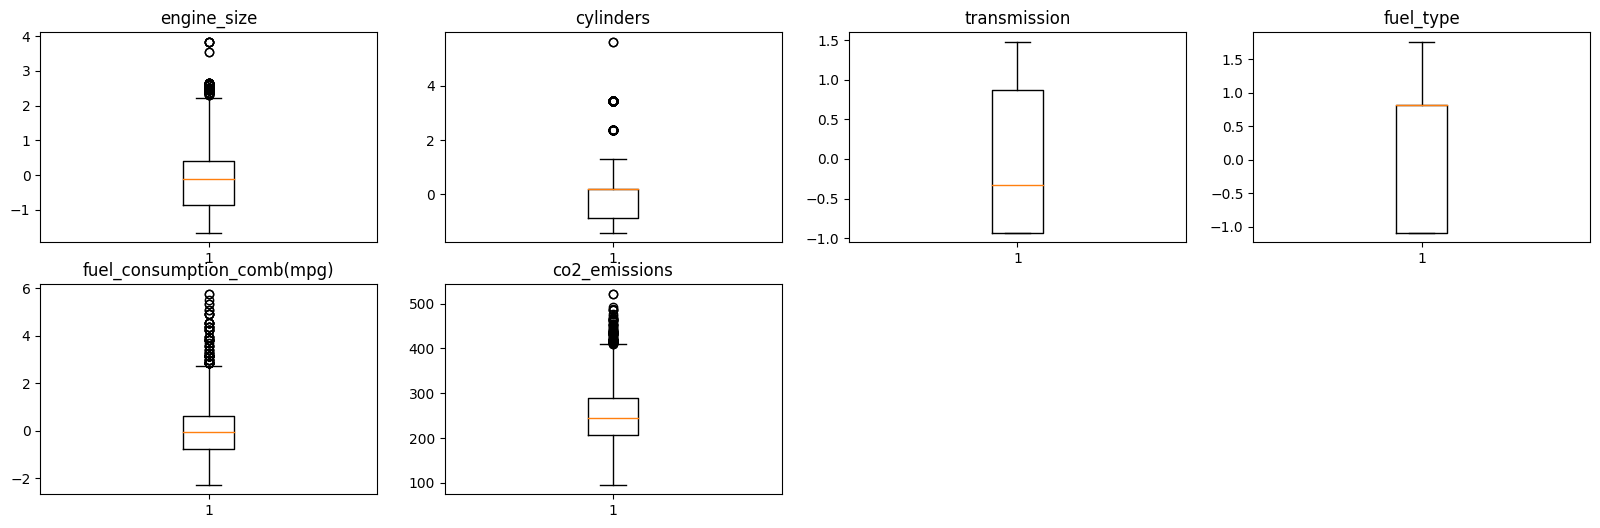

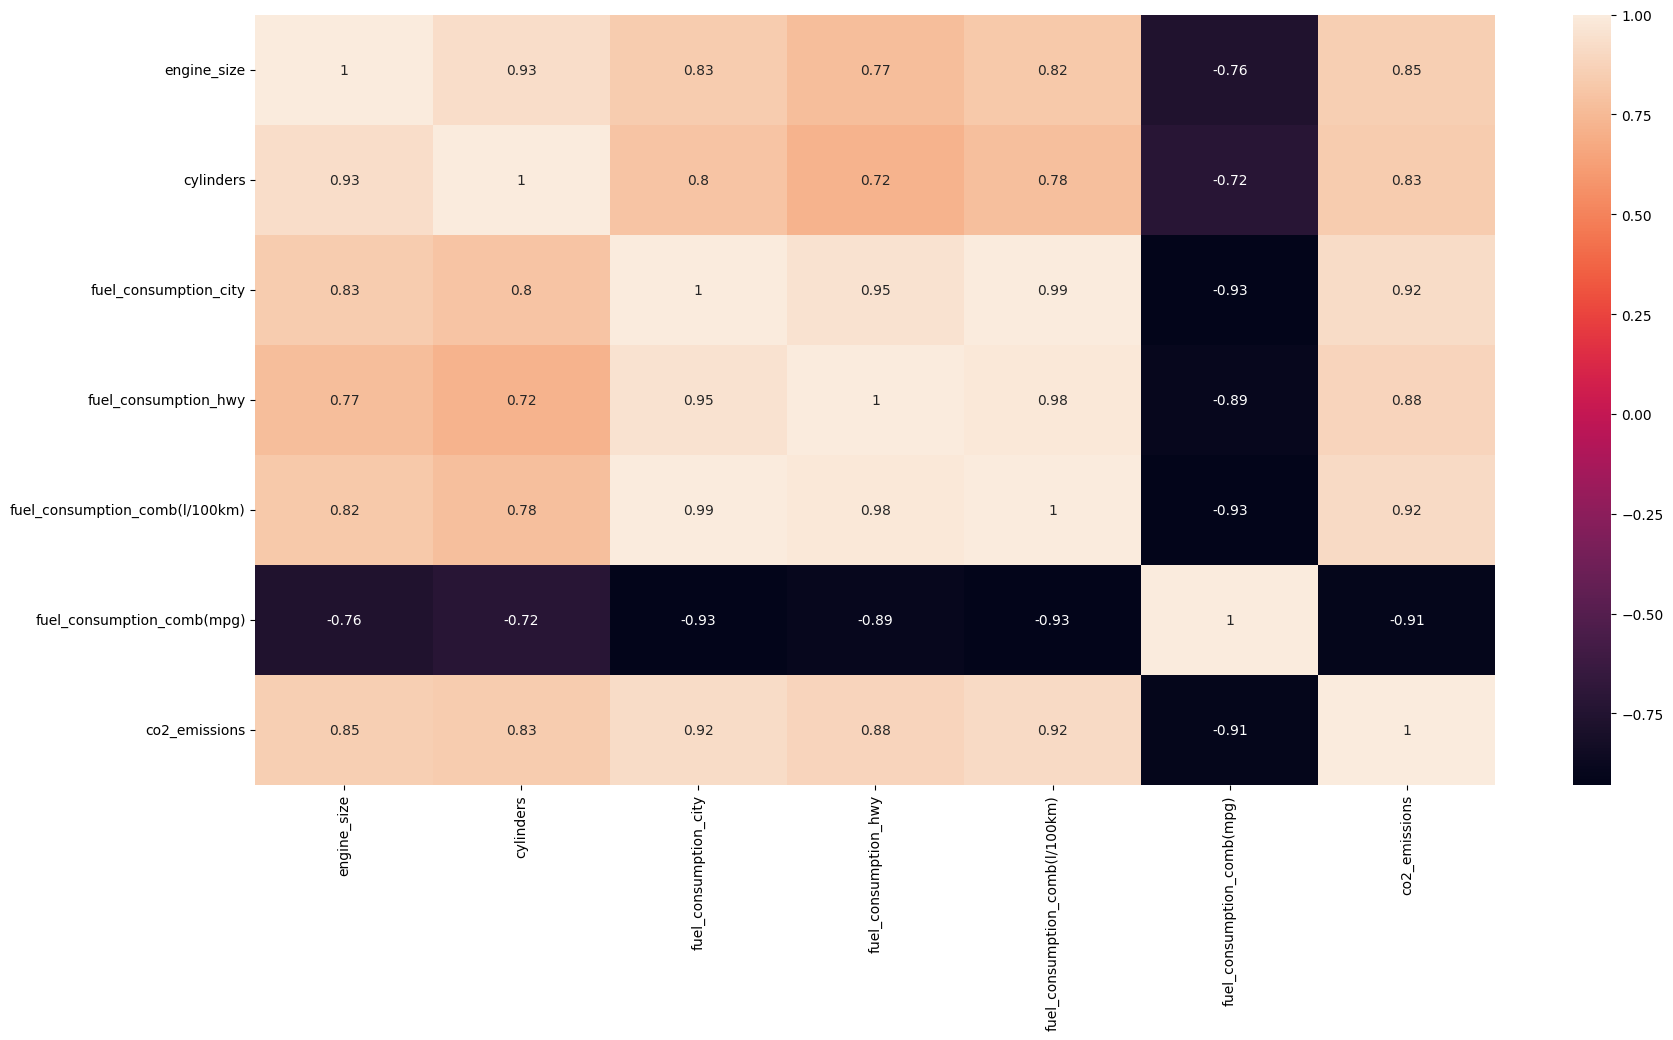

In [ ]:
sns.heatmap(corr,annot=True,cmap=None)
plt.show()

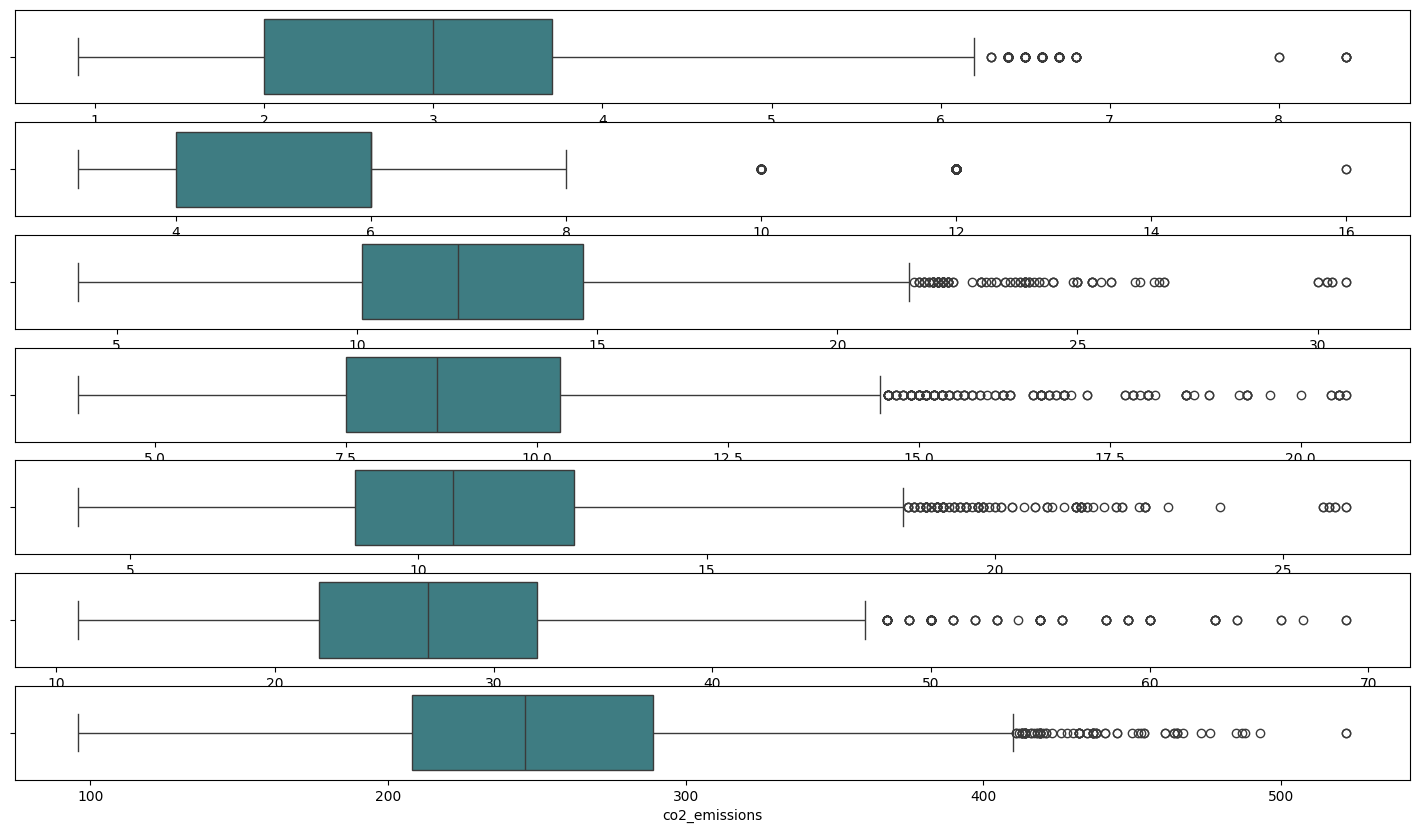

In [ ]:
ot=df.copy()
fig,axes=plt.subplots(7,1,figsize=(18,10),sharex=False,sharey=False)
sns.boxplot(x='engine_size',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='cylinders',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='fuel_consumption_city',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='fuel_consumption_hwy',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='fuel_consumption_comb(l/100km)',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='fuel_consumption_comb(mpg)',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='co2_emissions',data=ot,palette='crest',ax=axes[6])
plt.show()

In [ ]:
numerical=df.select_dtypes(include=np.number)

In [ ]:
Q1 = numerical.quantile(0.25)
Q3 = numerical.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

engine_size                        1.7
cylinders                          2.0
fuel_consumption_city              4.6
fuel_consumption_hwy               2.8
fuel_consumption_comb(l/100km)     3.8
fuel_consumption_comb(mpg)        10.0
co2_emissions                     81.0
dtype: float64


In [ ]:
  outlier = pd.DataFrame((numerical < (Q1 - 1.5 * IQR)) | (numerical > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print('Outliers in {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Outliers in engine_size are 121
Outliers in cylinders are 177
Outliers in fuel_consumption_city are 116
Outliers in fuel_consumption_hwy are 150
Outliers in fuel_consumption_comb(l/100km) are 115
Outliers in fuel_consumption_comb(mpg) are 93
Outliers in co2_emissions are 74


In [ ]:
## Data visualization

In [ ]:
print("We have total",len(df['make'].unique()),"Car Companies Data")

We have total 42 Car Companies Data


In [ ]:
df_brand = df['make'].value_counts().reset_index().rename(columns={'count':'Count'})
df_brand.head(20)

,make,Count
0,FORD,575
1,CHEVROLET,515
2,BMW,501
3,MERCEDES-BENZ,365
4,PORSCHE,296
5,GMC,289
6,TOYOTA,274
7,AUDI,263
8,NISSAN,213
9,MINI,200


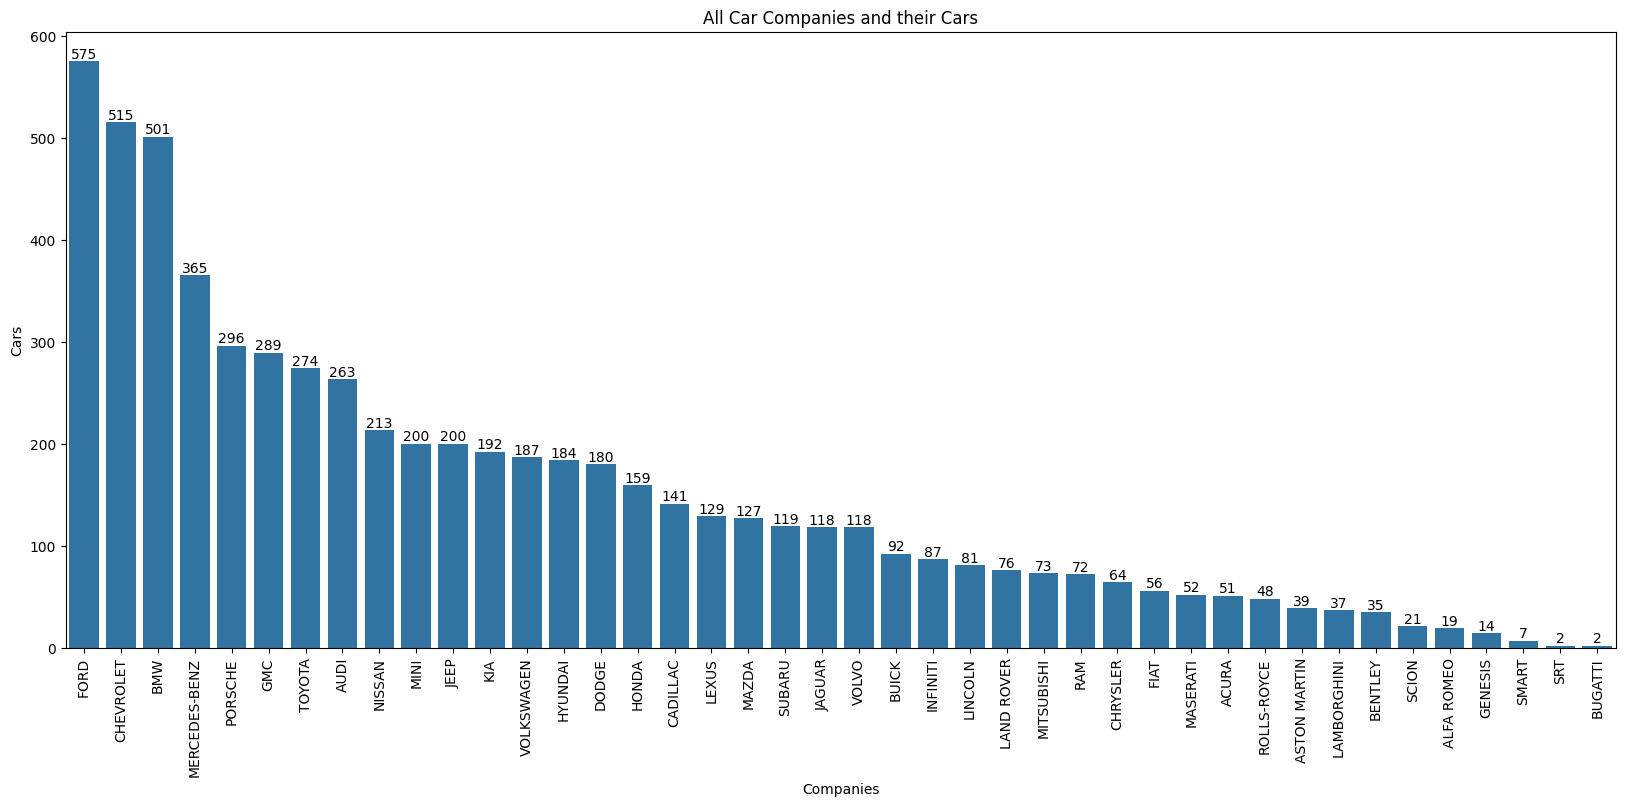

In [ ]:
plt.figure(figsize=(20,8))
figure1 = sns.barplot(data = df_brand, x = "make",  y= "Count")
plt.xticks(rotation = 90)
plt.title("All Car Companies and their Cars")
plt.xlabel("Companies")
plt.ylabel("Cars")
plt.bar_label(figure1.containers[0])
plt.show()

In [ ]:
#Checking the car model
print("We have total",len(df['model'].unique()),"Car Models")
df_model = df['model'].value_counts().reset_index().rename(columns={'count':'Count'})[:25]
df_model.head(20)

We have total 2053 Car Models


,model,Count
0,F-150 FFV,32
1,F-150 FFV 4X4,31
2,MUSTANG,26
3,FOCUS FFV,24
4,F-150 4X4,20
5,F-150,19
6,SONIC 5,18
7,ATS,18
8,JETTA,18
9,COMPASS,18


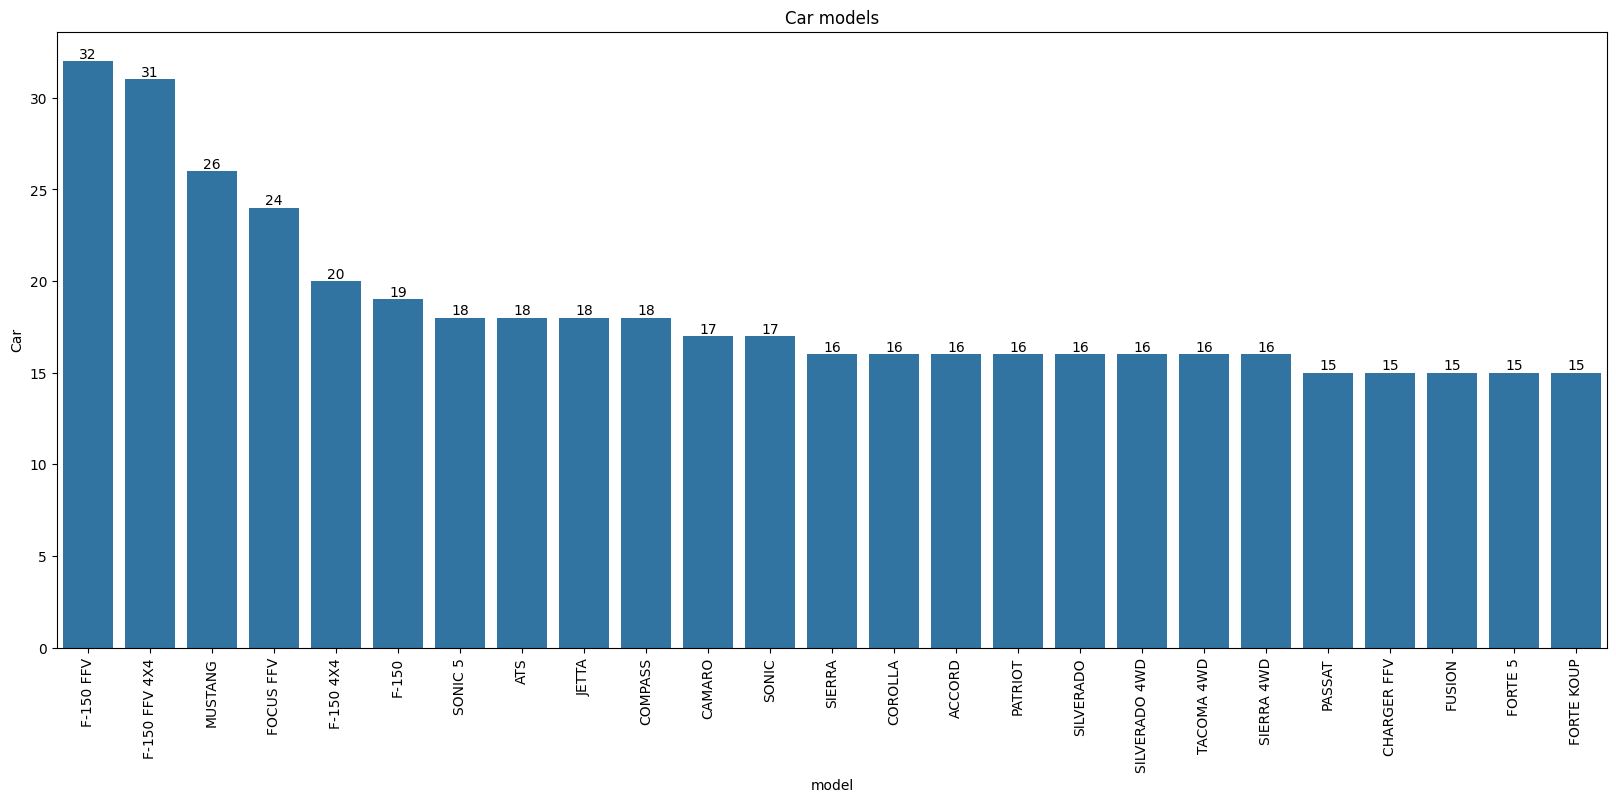

In [ ]:
plt.figure(figsize=(20,8))
figure2 = sns.barplot(df_model,x = "model", y = "Count")
plt.xticks(rotation = 90)
plt.title("Car models")
plt.xlabel("model")
plt.ylabel("Car")
plt.bar_label(figure2.containers[0])
plt.show()

In [ ]:
#Vehicle class
print("We have total",len(df['vehicle_class'].unique()),"Vehicle Class")
df_vehicle_class = df['vehicle_class'].value_counts().reset_index().rename(columns={'count':'Count'})
df_vehicle_class

We have total 16 Vehicle Class


,vehicle_class,Count
0,SUV - SMALL,1004
1,MID-SIZE,981
2,COMPACT,902
3,SUV - STANDARD,613
4,SUBCOMPACT,532
5,FULL-SIZE,508
6,PICKUP TRUCK - STANDARD,474
7,TWO-SEATER,381
8,MINICOMPACT,274
9,STATION WAGON - SMALL,212


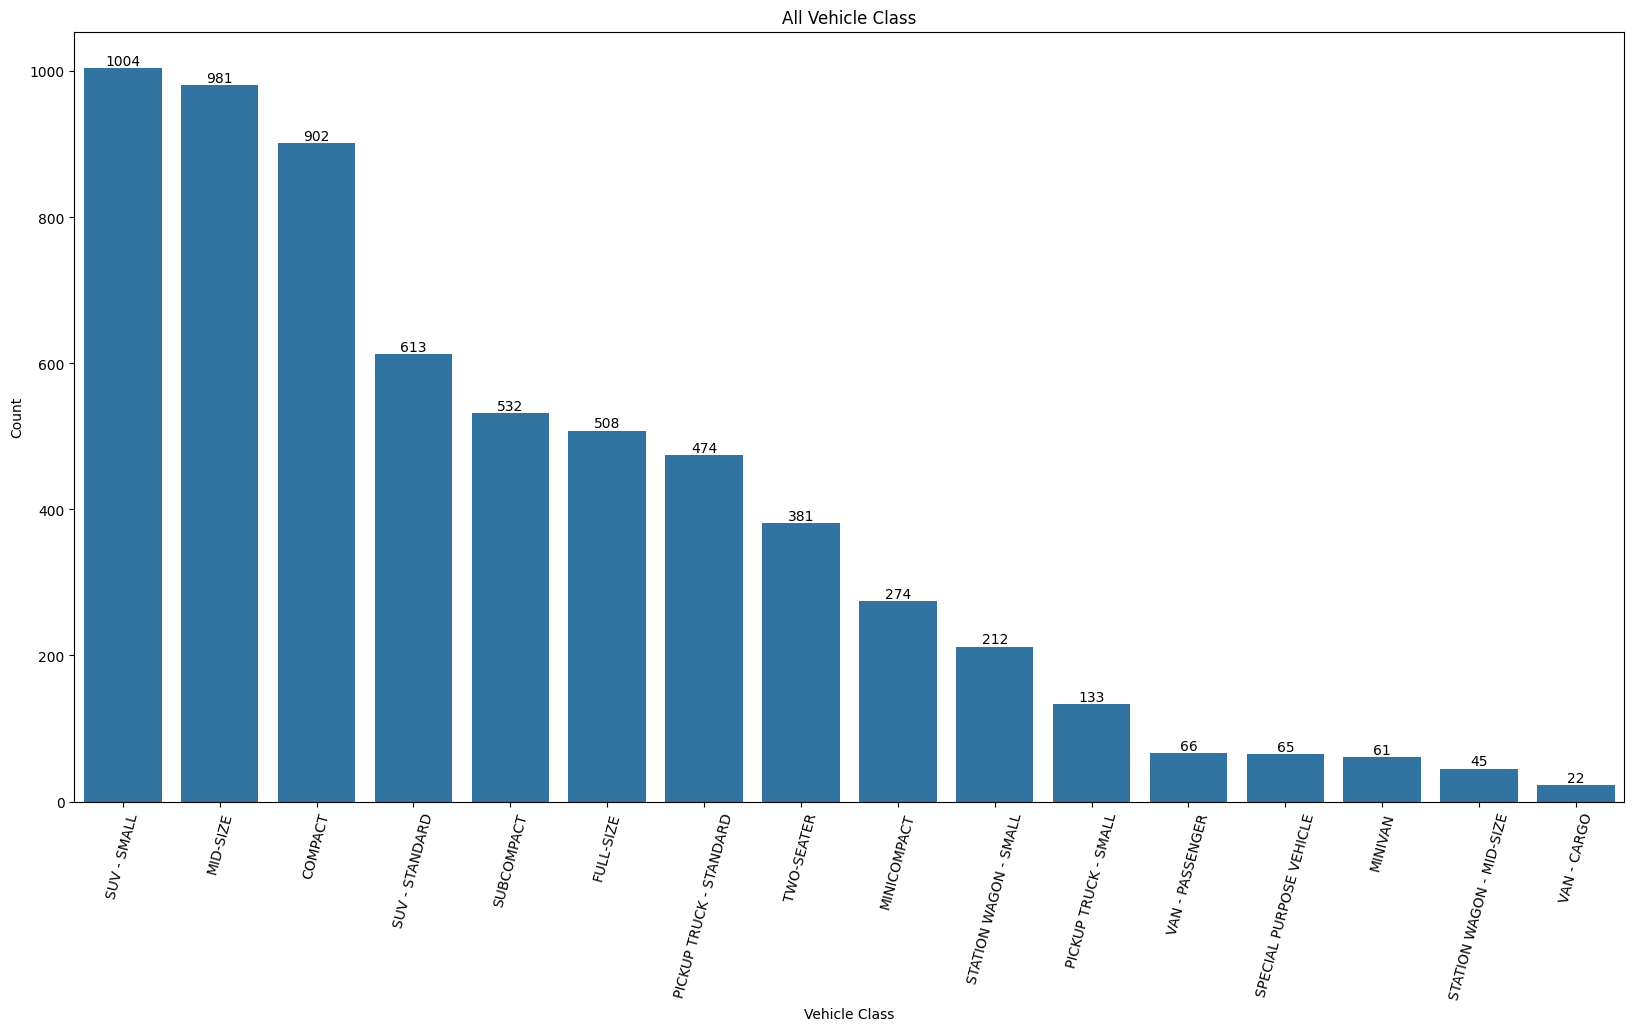

In [ ]:
plt.figure(figsize=(20,10))
figure3 = sns.barplot(df_vehicle_class, x = 'vehicle_class', y = 'Count')
plt.xticks(rotation = 75)
plt.title("All Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Count")
plt.bar_label(figure3.containers[0])
plt.show()


In [ ]:
#Engine Sizes of cars
print("We have total",len(df['engine_size'].unique()),"Type of engine size")
df_engine_size = df['engine_size'].value_counts().reset_index().rename(columns={'count':'Count'})
df_engine_size

We have total 51 Type of engine size


,engine_size,Count
0,2.0,1260
1,3.0,687
2,3.6,433
3,3.5,431
4,2.5,353
5,2.4,287
6,1.6,272
7,5.3,240
8,1.8,187
9,5.0,178


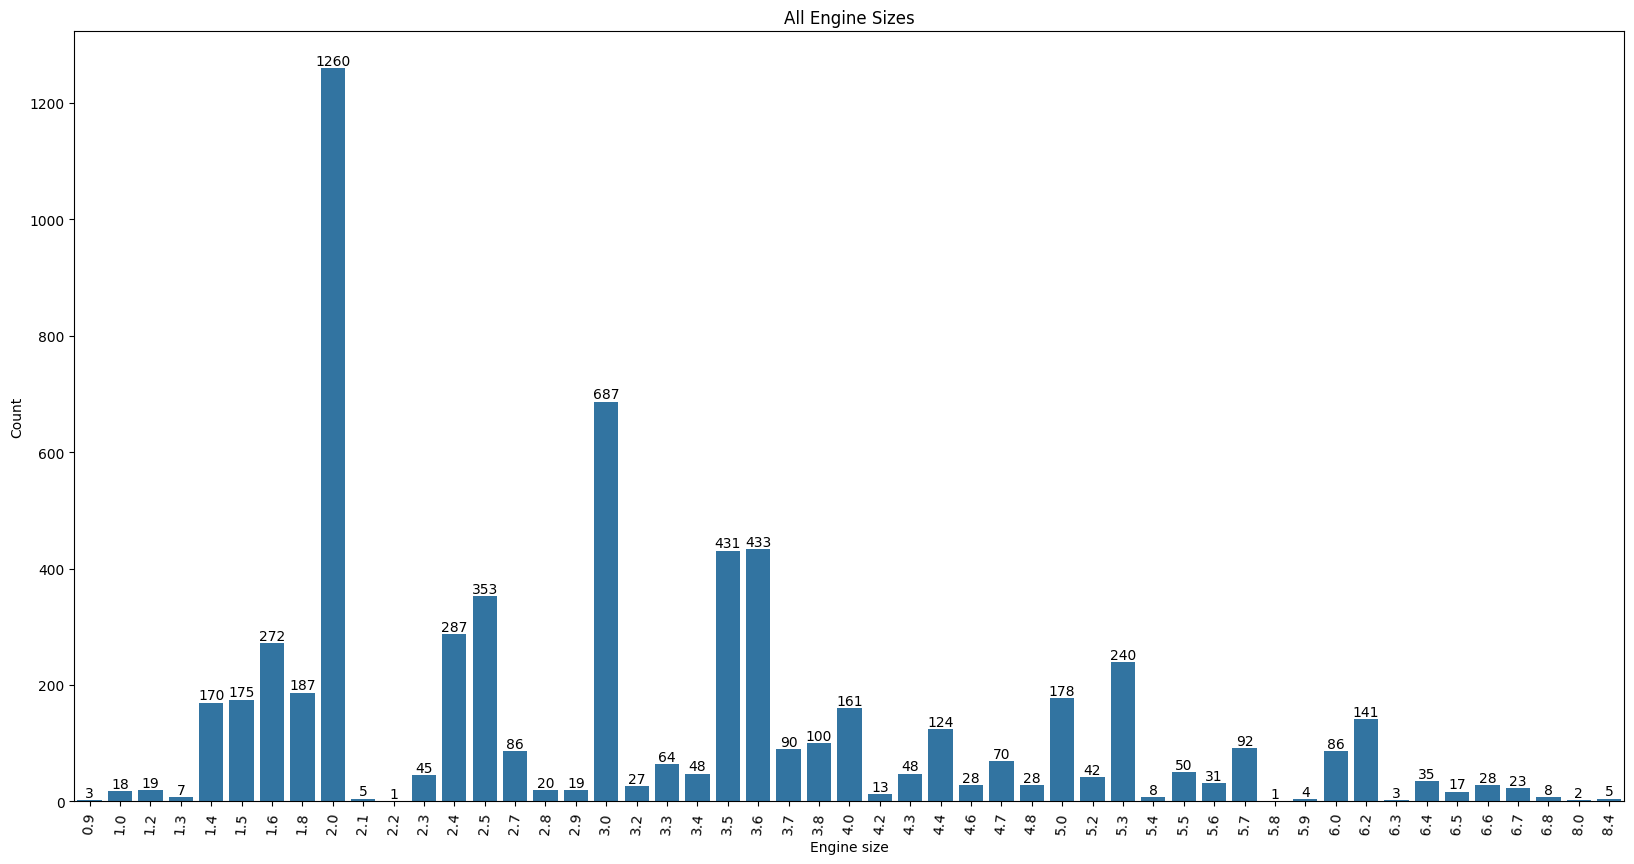

In [ ]:
plt.figure(figsize=(20,10))
figure4 = sns.barplot(df_engine_size, x = 'engine_size', y = 'Count')
plt.title("All Engine Sizes")
plt.xlabel("Engine size")
plt.ylabel("Count")
plt.xticks(rotation = 85)
plt.bar_label(figure4.containers[0])
plt.show()

In [ ]:
## Cylinders
print("We have total", len(df['cylinders'].unique()),"Type of Cyliners")
df_cylinders = df['cylinders'].value_counts().reset_index().rename(columns={'count':'Count'})
df_cylinders

We have total 8 Type of Cyliners


,cylinders,Count
0,4,2741
1,6,2040
2,8,1201
3,12,135
4,3,88
5,10,40
6,5,26
7,16,2


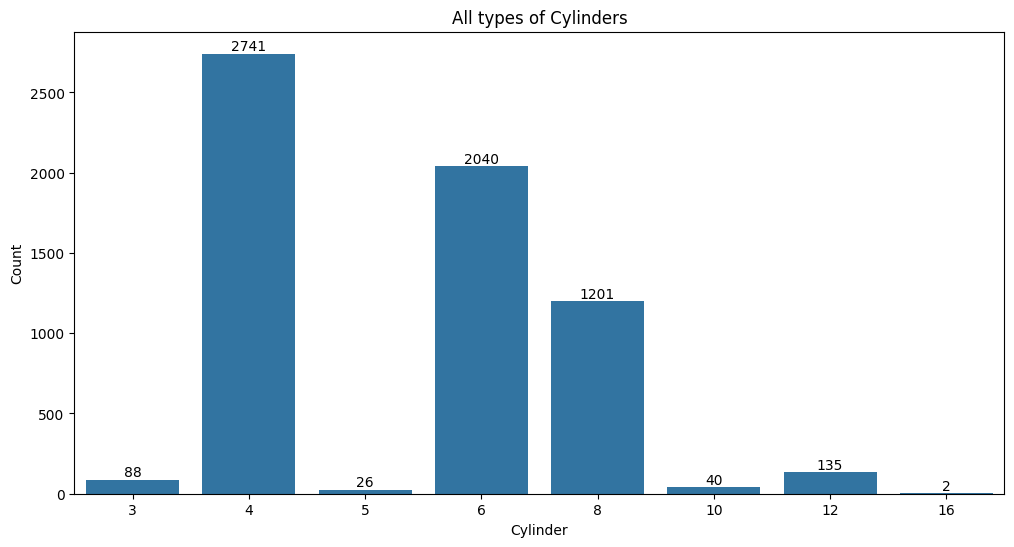

In [ ]:
plt.figure(figsize=(12,6))
figure5 = sns.barplot(df_cylinders, x = 'cylinders', y = 'Count')
plt.title("All types of Cylinders")
plt.xlabel("Cylinder")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.bar_label(figure5.containers[0])
plt.show()

In [ ]:
df['transmission'].unique()

array(['AS', 'M', 'AV', 'AM', 'A'], dtype=object)

In [ ]:
df['transmission'] = np.where(df['transmission'].isin(['AS']),"1",df['transmission'])
df['transmission'] = np.where(df['transmission'].isin(['M']),"2",df['transmission'])
df['transmission'] = np.where(df['transmission'].isin(['AV']),"3", df['transmission'])
df['transmission'] = np.where(df['transmission'].isin(['AM']),"4", df['transmission'])
df['transmission'] = np.where(df['transmission'].isin(['A']),"5", df['transmission'])

In [ ]:
print("We have total",len(df['transmission'].unique()),"Transmissions")
df_transmission = df['transmission'].value_counts().reset_index().rename(columns={'count':'Count'})
df_transmission

We have total 5 Transmissions


,transmission,Count
0,1,2720
1,5,1536
2,2,1019
3,4,540
4,3,458


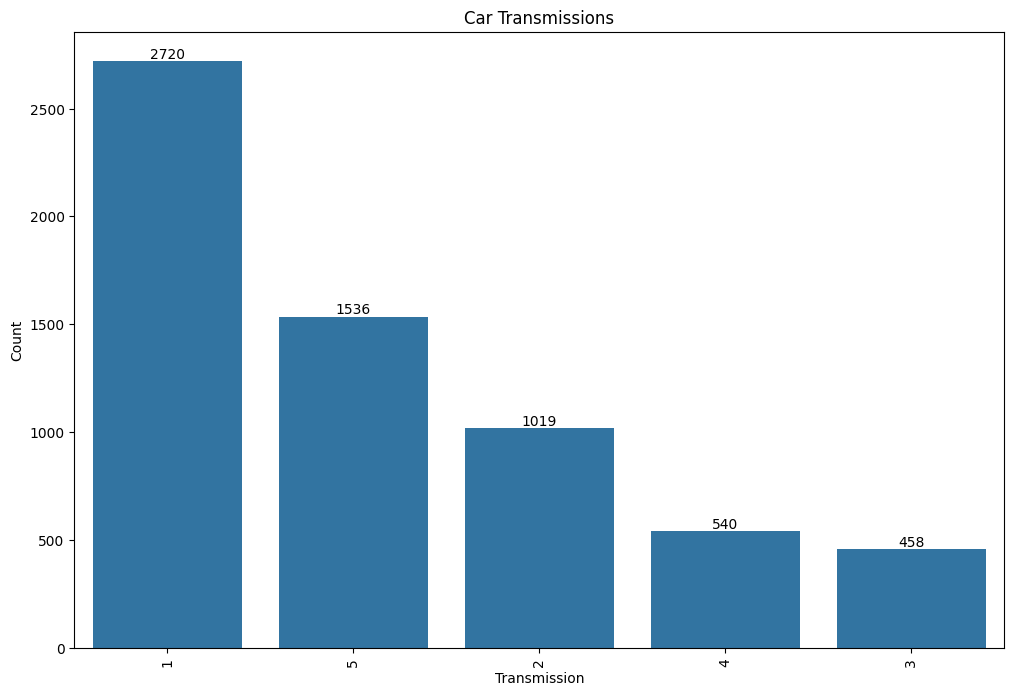

In [ ]:
plt.figure(figsize=(12,8))
figure5 = sns.barplot(df_transmission, x = 'transmission', y = 'Count')
plt.title("Car Transmissions")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.bar_label(figure5.containers[0])
plt.show()

In [ ]:
## Types of fuels
df['fuel_type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [ ]:
df['fuel_type'] = np.where(df['fuel_type'].isin(['Z']), "1", df['fuel_type'])
df['fuel_type'] = np.where(df['fuel_type'].isin(['D']), "2", df['fuel_type'])
df['fuel_type'] = np.where(df['fuel_type'].isin(['X']), "3", df['fuel_type'])
df['fuel_type'] = np.where(df['fuel_type'].isin(['E']), "4", df['fuel_type'])
df['fuel_type'] = np.where(df['fuel_type'].isin(['N']), "5", df['fuel_type'])

In [ ]:
print("We have total",len(df['fuel_type'].unique()),"Fuel Types")
df_fuel_type = df['fuel_type'].value_counts().reset_index().rename(columns= {'count':'Count'})
df_fuel_type

We have total 5 Fuel Types


,fuel_type,Count
0,3,3030
1,1,2765
2,4,330
3,2,147
4,5,1


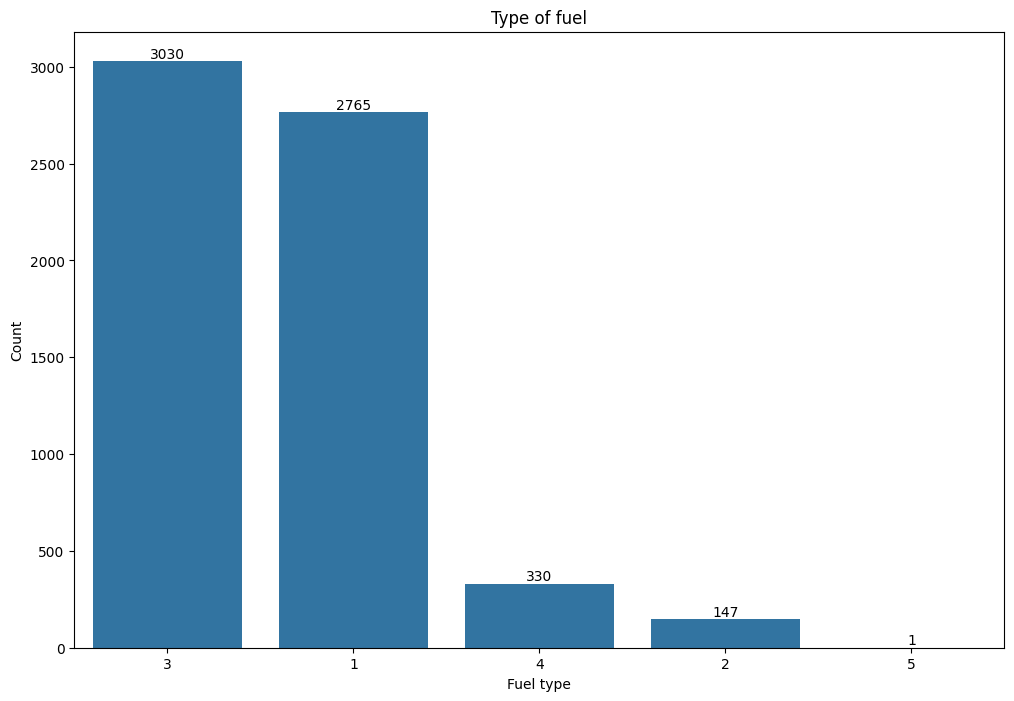

In [ ]:
plt.figure(figsize=(12,8))
figure6 = sns.barplot(df_fuel_type, x = 'fuel_type', y = 'Count')
plt.title("Type of fuel")
plt.xlabel("Fuel type")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.bar_label(figure6.containers[0])
plt.show()

In [ ]:
## Displot
sns.distplot(df['fuel_consumption_comb(l/100km)'])

<Axes: xlabel='fuel_consumption_comb(l/100km)', ylabel='Density'>

In [ ]:
sns.distplot(df['cylinders'])

<Axes: xlabel='cylinders', ylabel='Density'>

In [ ]:
sns.distplot(df['fuel_consumption_comb(mpg)'])

<Axes: xlabel='fuel_consumption_comb(mpg)', ylabel='Density'>

In [ ]:
df

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,1,1,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,2,1,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,3,1,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,1,1,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,1,1,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
6268,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,1,1,10.7,7.7,9.4,30,219
6269,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,1,1,11.2,8.3,9.9,29,232
6270,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,1,1,11.7,8.6,10.3,27,240
6271,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,1,1,11.2,8.3,9.9,29,232


In [ ]:
## Variation in CO2 emissions with different features


In [ ]:
## Co2 emission with brand

In [ ]:
df_co2_make = df.groupby(['make'])['co2_emissions'].mean().sort_values().reset_index()
df_co2_make.head()

,make,co2_emissions
0,SMART,151.428571
1,HONDA,191.622642
2,FIAT,192.285714
3,MAZDA,192.755906
4,MINI,196.570000


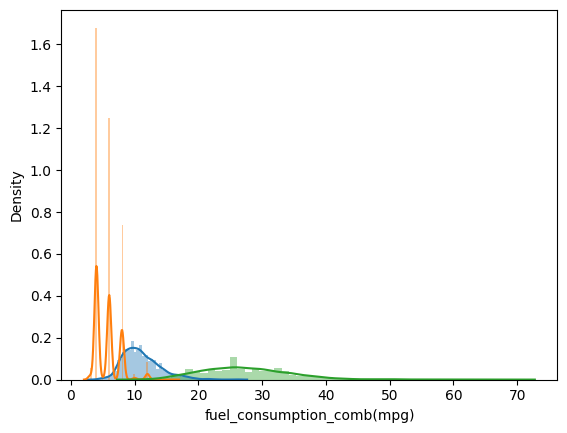

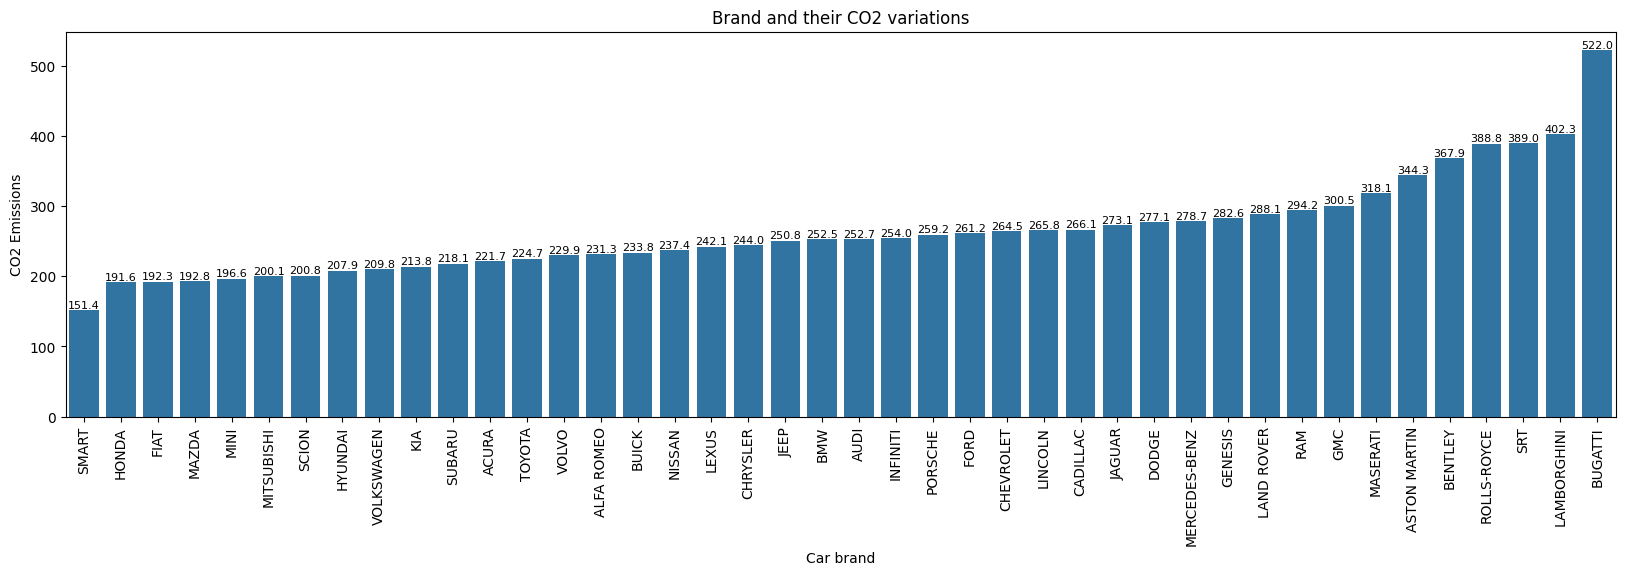

In [ ]:
plt.figure(figsize=(20,5))
figure8 = sns.barplot(df_co2_make,x = "make", y = "co2_emissions")
plt.xlabel("Car brand")
plt.ylabel("CO2 Emissions")
plt.title("Brand and their CO2 variations")
plt.xticks(rotation = 90)
plt.bar_label(figure8.containers[0],fontsize = 8, fmt = '%.1f')
plt.show()

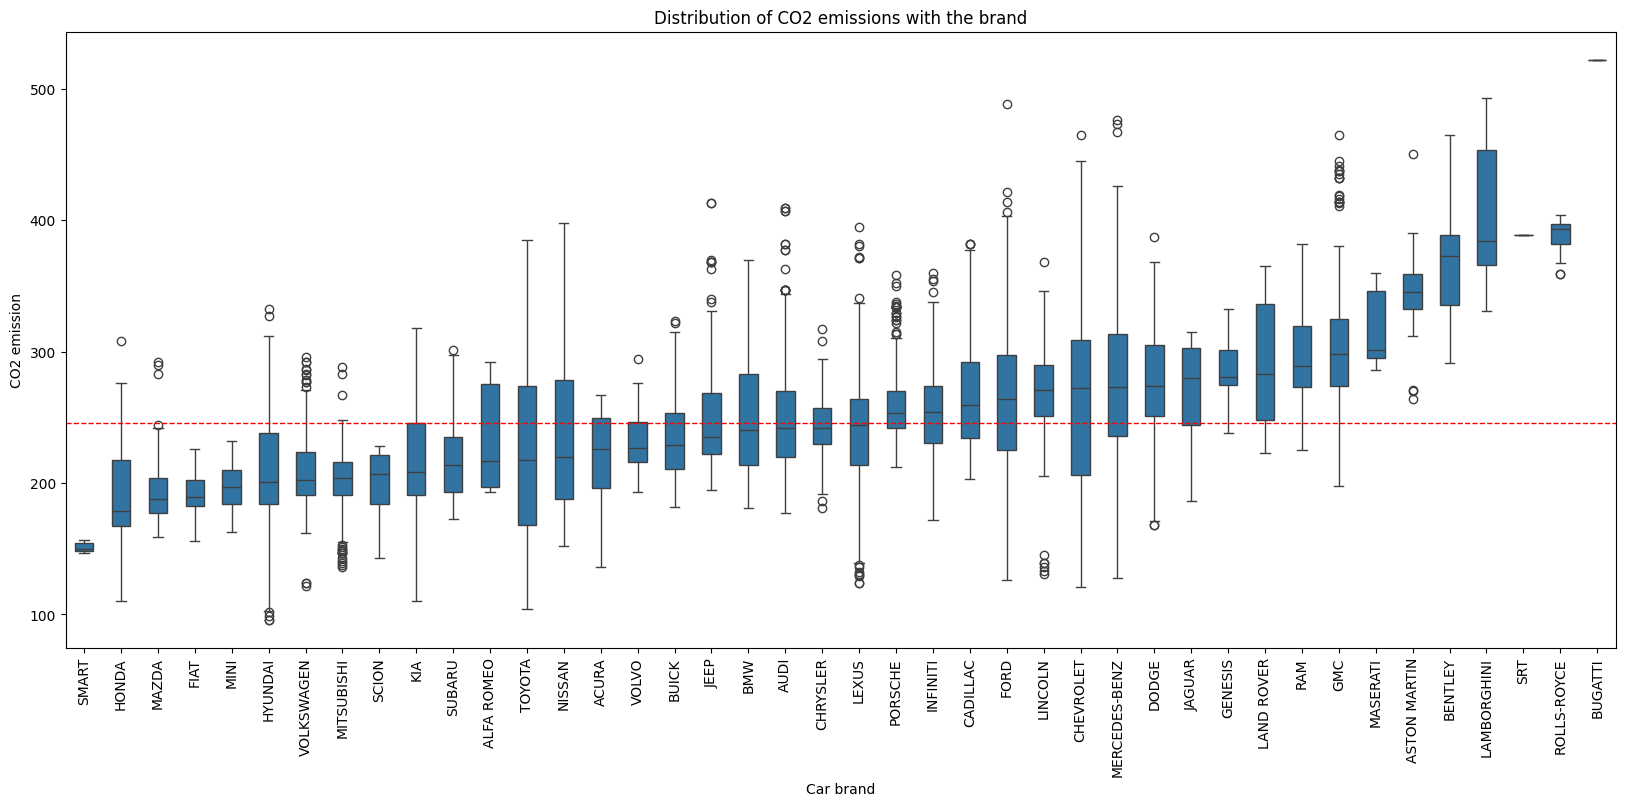

In [ ]:
plt.figure(figsize=(20,8))
order = df.groupby('make')['co2_emissions'].median().sort_values(ascending=True).index
sns.boxplot(df, order=order, x = 'make', y = 'co2_emissions',width=0.5)
plt.title("Distribution of CO2 emissions with the brand")
plt.xticks(rotation = 90, horizontalalignment = 'center')
plt.xlabel("Car brand")
plt.ylabel("CO2 emission")
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=1)
plt.show()

In [ ]:
## Co2 emission with vehicle class

In [ ]:
df_co2_class = df.groupby(["vehicle_class"])['co2_emissions'].mean().sort_values().reset_index()
df_co2_class.head()

,vehicle_class,co2_emissions
0,STATION WAGON - SMALL,202.834906
1,COMPACT,217.707317
2,MID-SIZE,222.507645
3,SUV - SMALL,236.518924
4,MINICOMPACT,236.675182


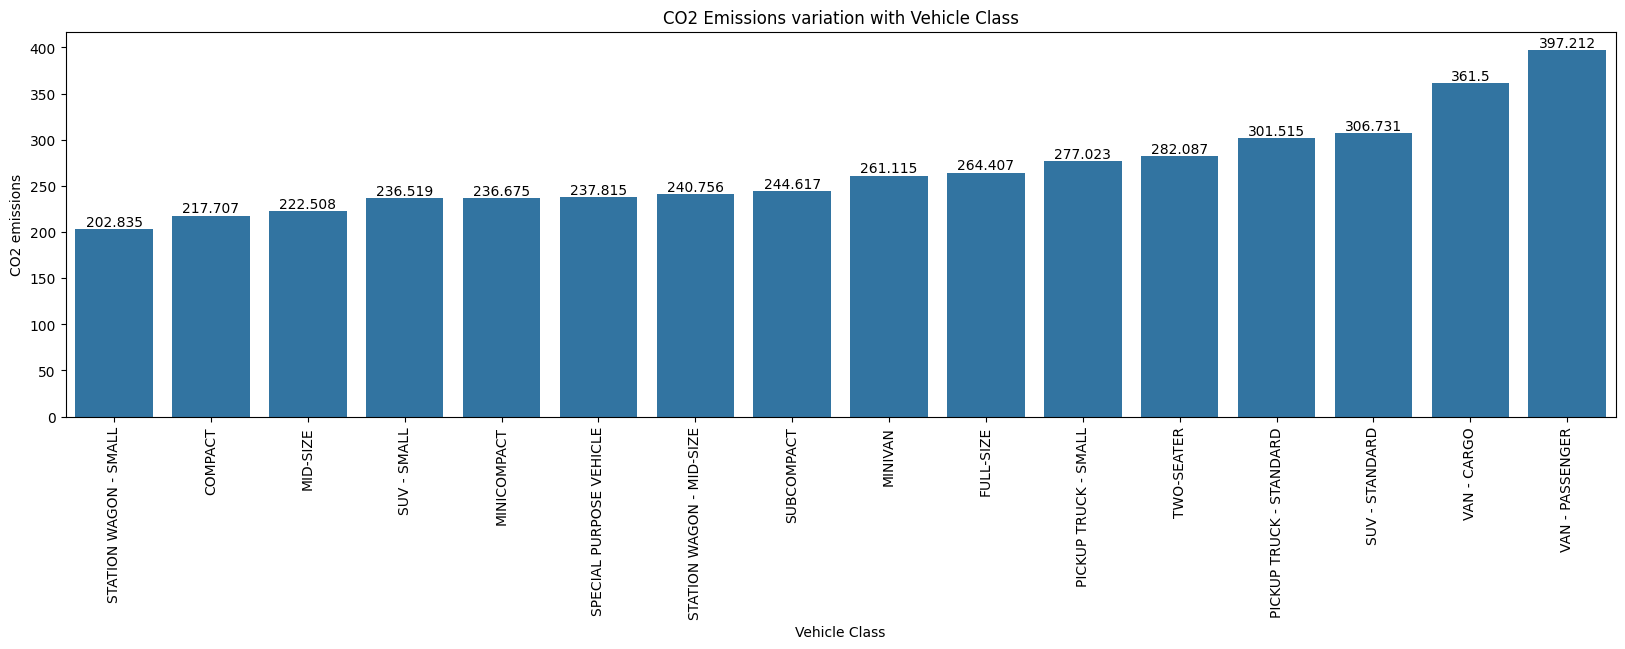

In [ ]:
plt.figure(figsize=(20,5))
figure9 = sns.barplot(df_co2_class,x = "vehicle_class", y = 'co2_emissions')
plt.title("CO2 Emissions variation with Vehicle Class")
plt.xticks(rotation = 90)
plt.xlabel("Vehicle Class")
plt.ylabel("CO2 emissions")
plt.bar_label(figure9.containers[0])
plt.show()

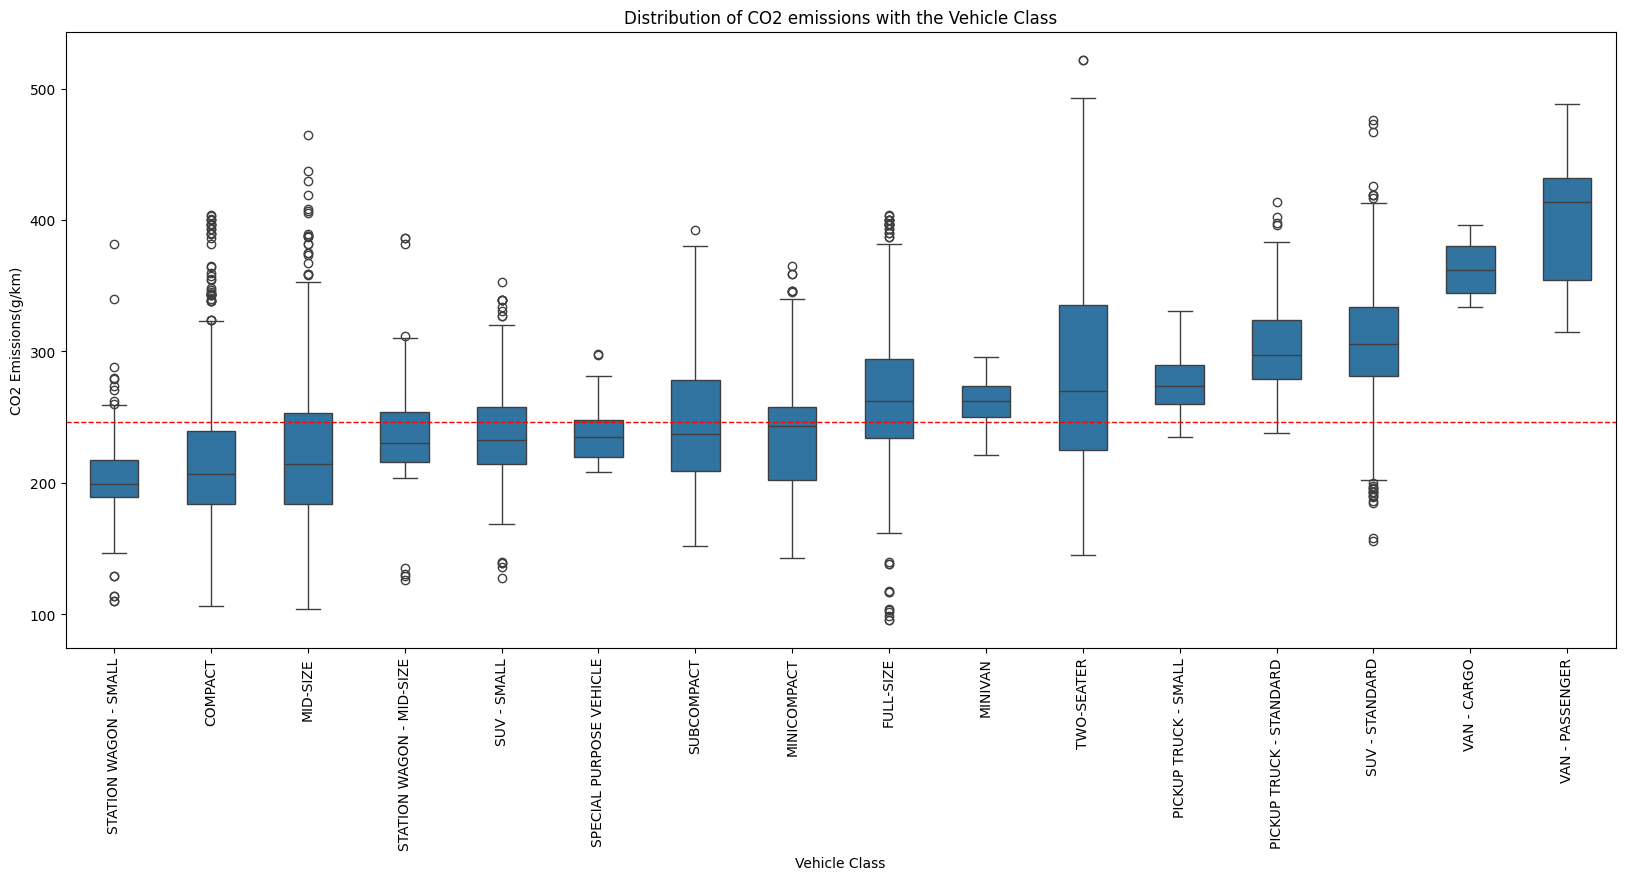

In [ ]:
plt.figure(figsize=(20,8))
order = df.groupby("vehicle_class")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="vehicle_class", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 emissions with the Vehicle Class")
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Vehicle Class")
plt.ylabel("CO2 Emissions(g/km)")
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=1)
plt.show()

In [ ]:
## CO2 emission with transmissions

In [ ]:
df.head(3)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,1,1,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,2,1,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,3,1,6.0,5.8,5.9,48,136


In [ ]:
df_co2_transmission = df.groupby(['transmission'])['co2_emissions'].mean().sort_values().reset_index()
df_co2_transmission.head()

,transmission,co2_emissions
0,3,184.155022
1,2,228.347399
2,4,251.788889
3,1,255.652206
4,5,278.453776


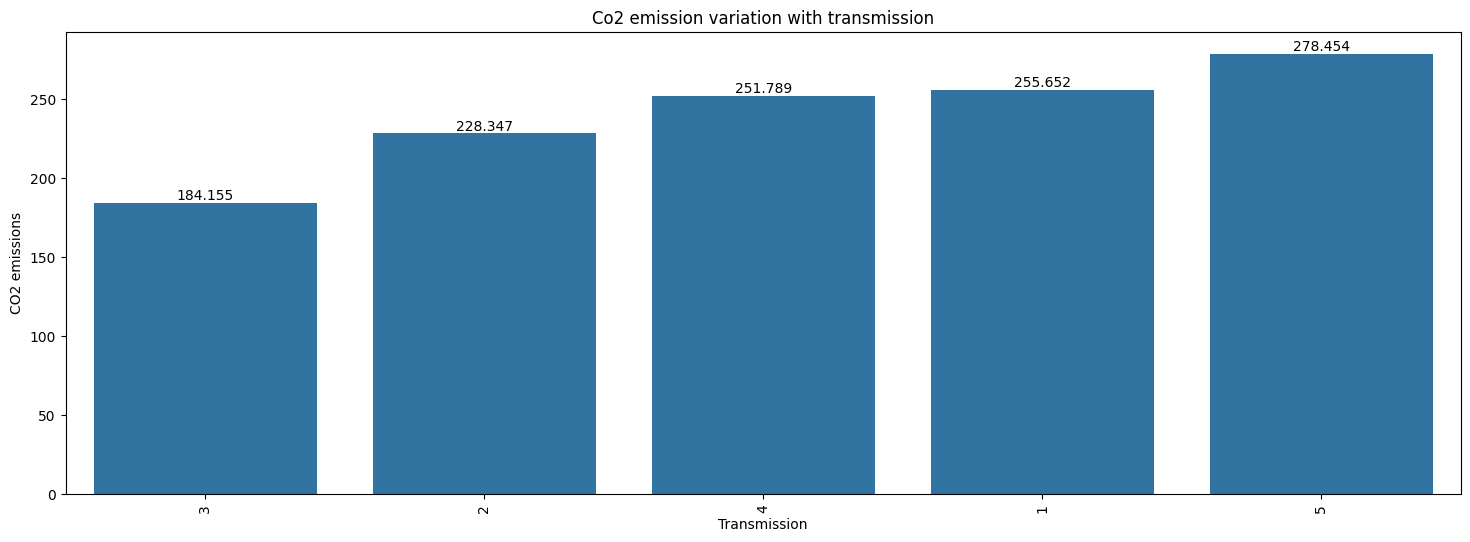

In [ ]:
plt.figure(figsize=(18,6))
figure10 = sns.barplot(df_co2_transmission, x = 'transmission', y = 'co2_emissions')
plt.title("Co2 emission variation with transmission")
plt.xticks(rotation = 90)
plt.xlabel("Transmission")
plt.ylabel("CO2 emissions")
plt.bar_label(figure10.containers[0])
plt.show()

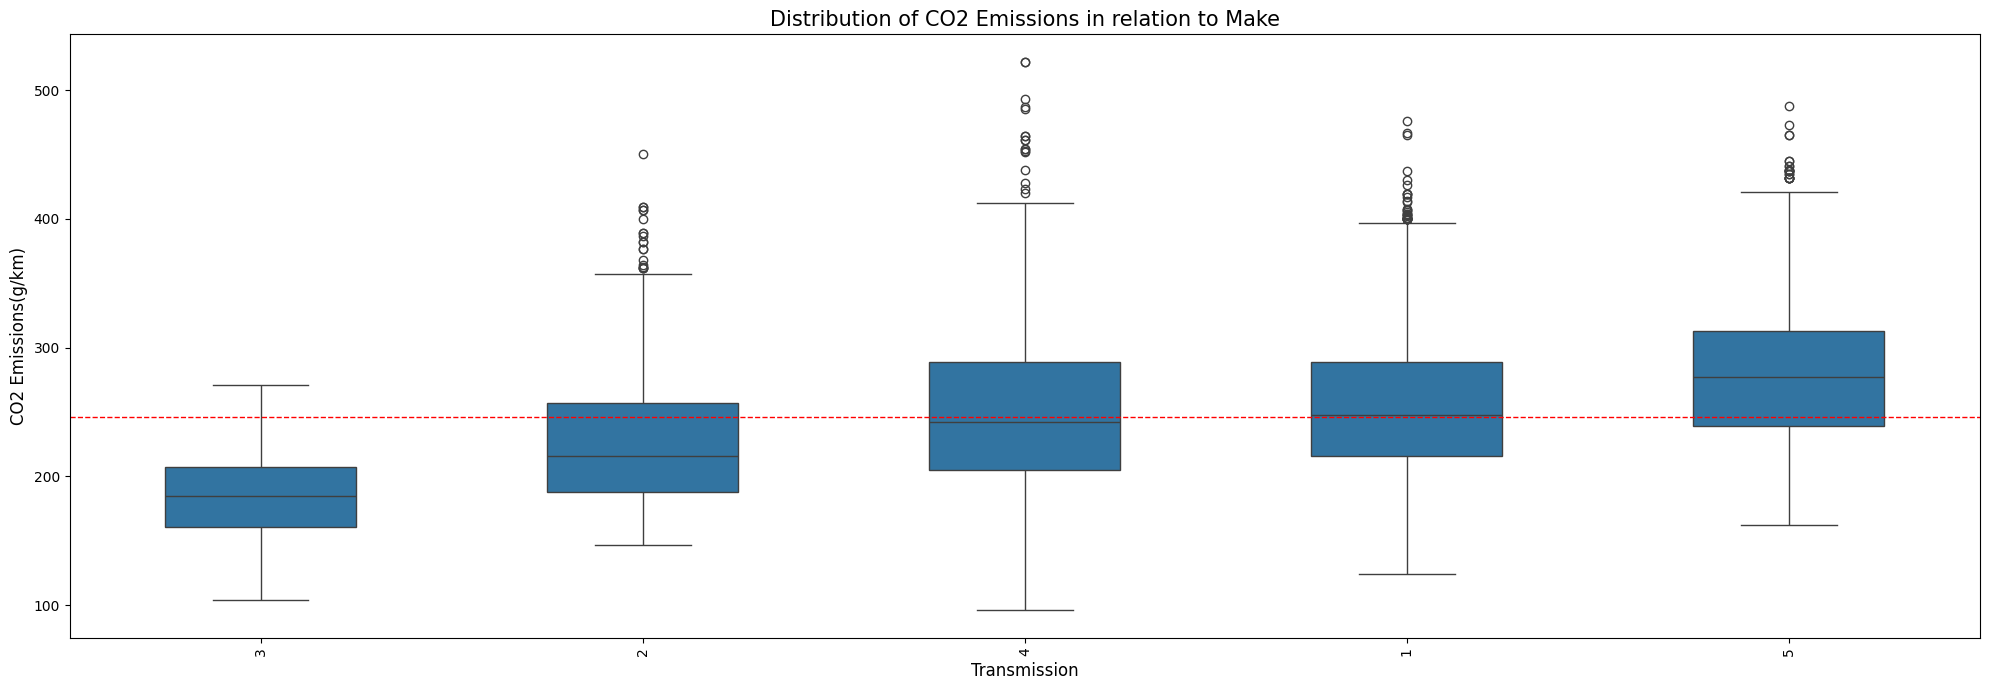

In [ ]:
plt.figure(figsize=(20,7))
order = df.groupby("transmission")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="transmission", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Transmission", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

In [ ]:
## CO2 emissions variation with fuel type



In [ ]:
df_co2_fuel_type = df.groupby(['fuel_type'])['co2_emissions'].mean().sort_values().reset_index()
df_co2_fuel_type.head()

,fuel_type,co2_emissions
0,5,213.000000
1,2,235.238095
2,3,236.118152
3,1,265.731284
4,4,276.048485


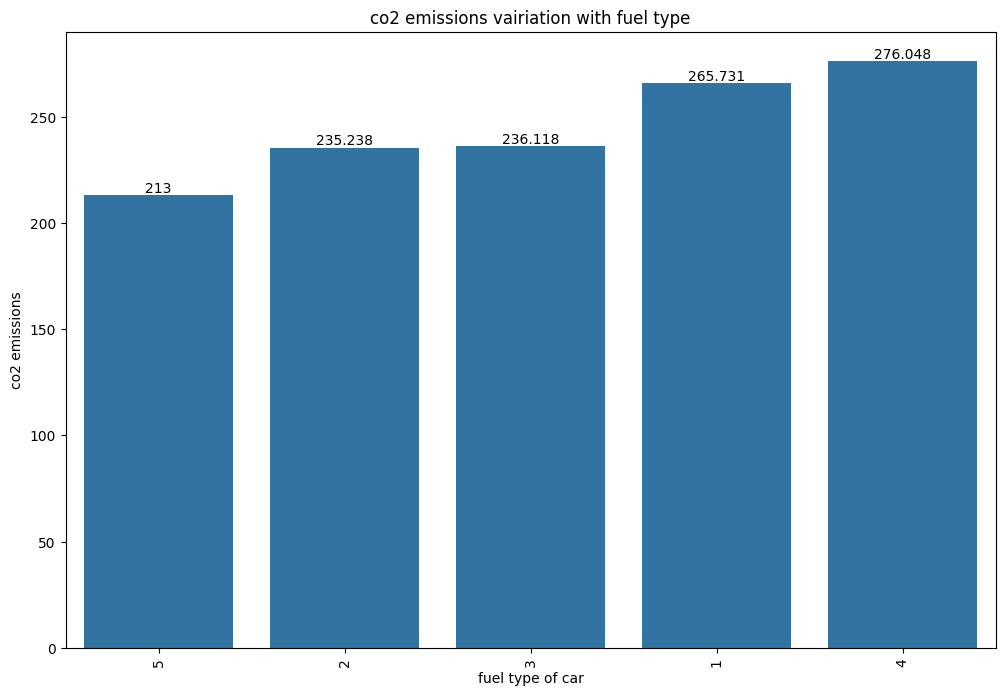

In [ ]:
plt.figure(figsize =(12,8) )
figure11=sns.barplot(df_co2_fuel_type,x="fuel_type",y="co2_emissions")
plt.title("co2 emissions vairiation with fuel type")
plt.xticks(rotation=90)
plt.xlabel("fuel type of car")
plt.ylabel("co2 emissions")
plt.bar_label(figure11.containers[0])
plt.show()

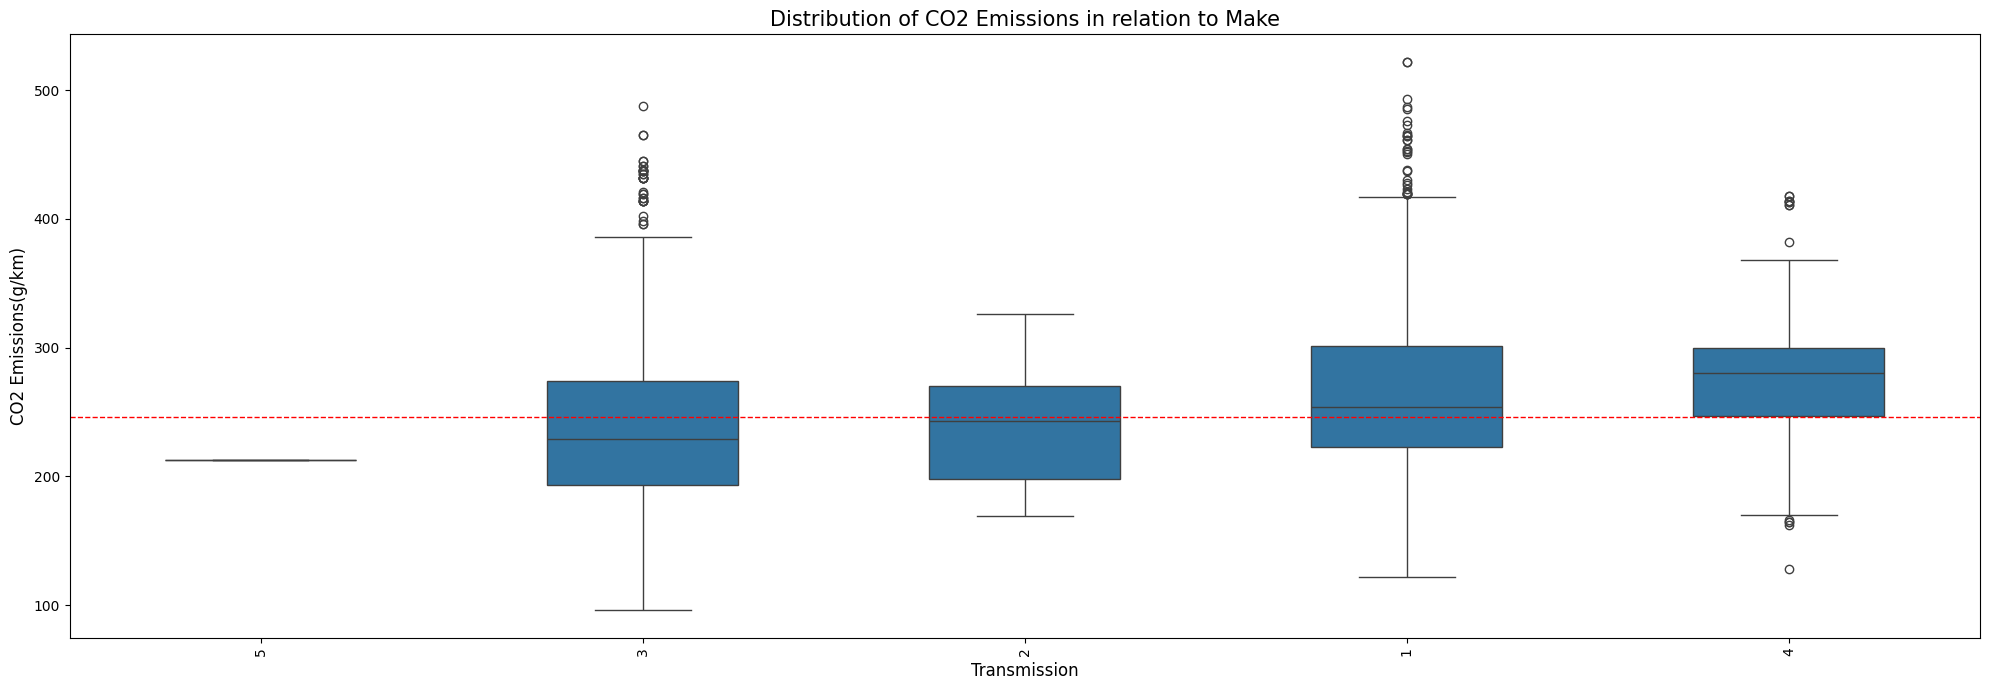

In [ ]:
plt.figure(figsize=(20,7))
order = df.groupby("fuel_type")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="fuel_type", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Transmission", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

In [ ]:
## Identifying the skewness of the dataset

In [ ]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,1,1,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,2,1,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,3,1,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,1,1,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,1,1,12.1,8.7,10.6,27,244


In [ ]:
## Identify the skewness of the data

In [ ]:
X_parameter = 'engine_size'
Y_parameter = 'co2_emissions'


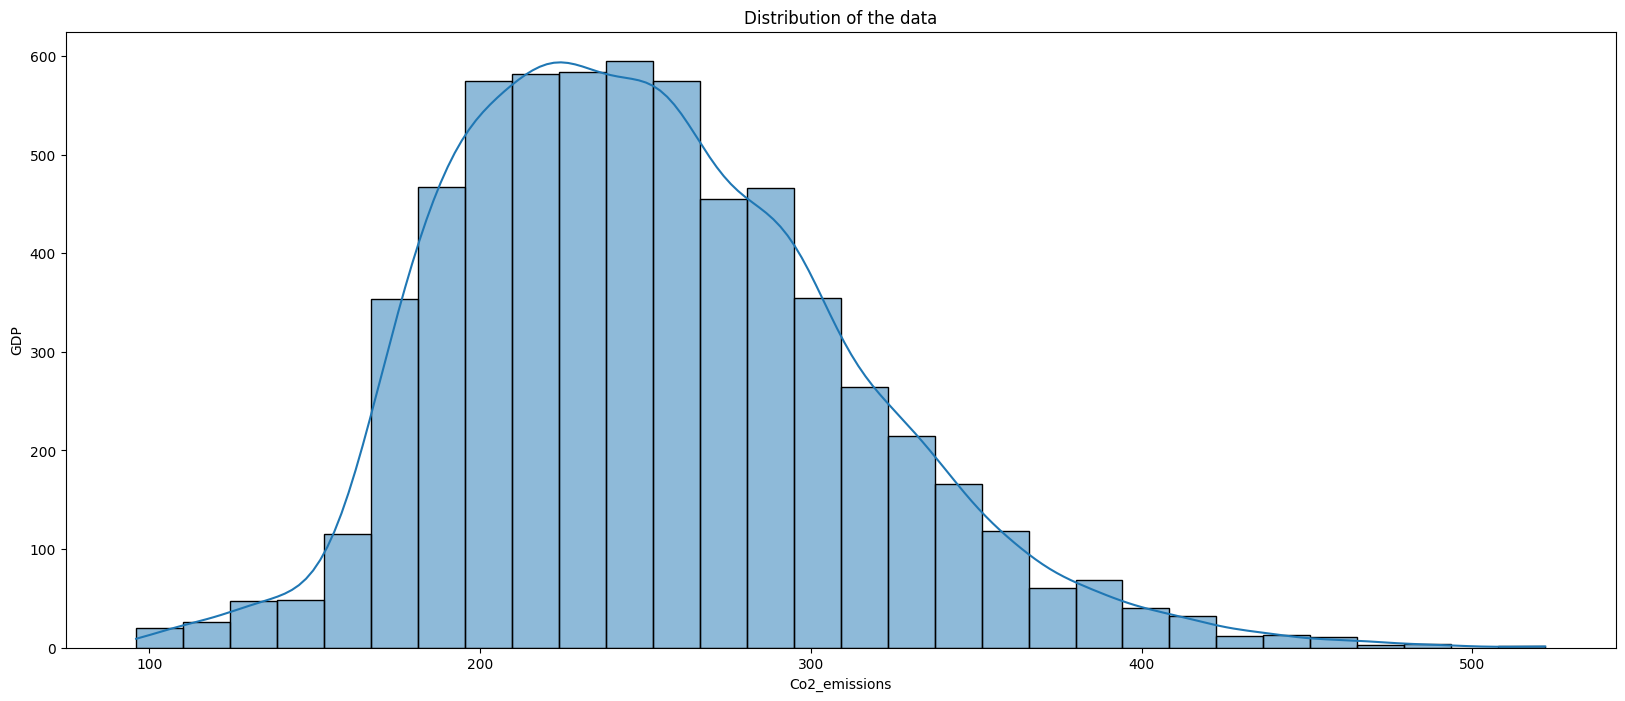

In [ ]:
#use scatter plot
plt.figure(figsize=(20,8))
sns.histplot(df['co2_emissions'],bins = 30, kde=True)
plt.xlabel("Co2_emissions")
plt.ylabel("GDP")
plt.title("Distribution of the data")
plt.show()

In [ ]:
# As we can see, the data has right/positive skewness

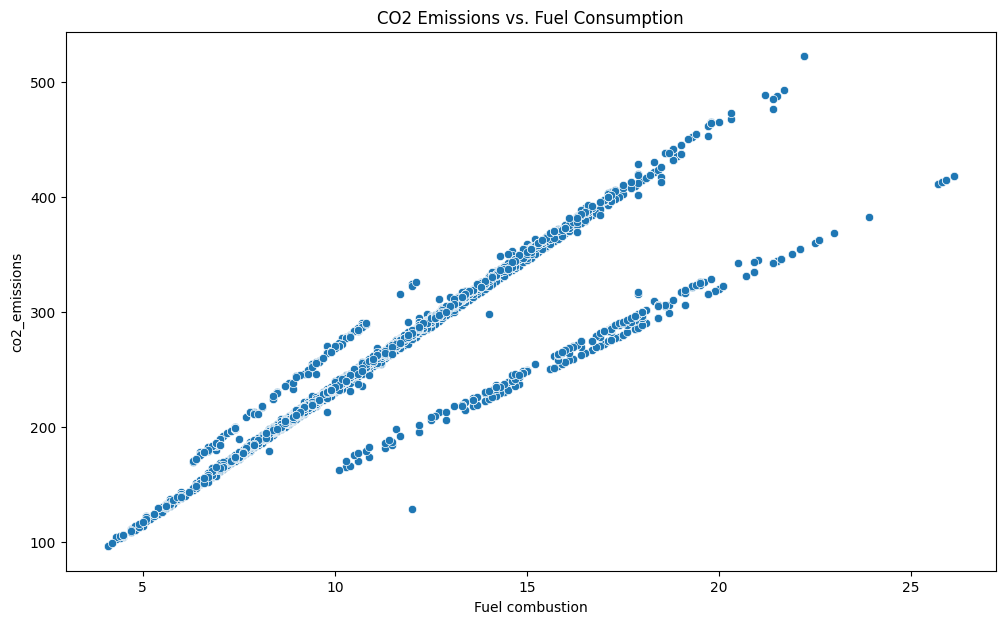

In [ ]:
## Visualize the relation between co2 emissions and fuel combustion with scatterplot
plt.figure(figsize=(12,7))
sns.scatterplot(x = 'fuel_consumption_comb(l/100km)', y = 'co2_emissions',data=df)
plt.title("CO2 Emissions vs. Fuel Consumption")
plt.xlabel("Fuel combustion")
plt.ylabel("co2_emissions")
plt.show()

In [ ]:
## Correlation Analysis

In [ ]:
sns.pairplot(df)

In [ ]:
## Data Cleaning
## We can remove the natural gas, as it doesn't effect much on our data

In [ ]:
df_natural = df[df['fuel_type']=='5']
natural = df_natural.index
df_natural

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
2232,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,1,5,15.2,9.5,12.7,22,213


In [ ]:
#removing natural gas from the dataset
for i in natural:
    df.drop(i,axis=0,inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df[df['fuel_type']=='5'] # as we can see that, we've successfully dropped the natural gas variable from our data

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions


In [ ]:
df_check = df['fuel_type'].value_counts().reset_index().rename(columns={'count':'Count'})
df_check

,fuel_type,Count
0,3,3030
1,1,2765
2,4,330
3,2,147


In [ ]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,1,1,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,2,1,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,3,1,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,1,1,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,1,1,12.1,8.7,10.6,27,244


In [ ]:
df.tail()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
6267,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,1,1,10.7,7.7,9.4,30,219
6268,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,1,1,11.2,8.3,9.9,29,232
6269,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,1,1,11.7,8.6,10.3,27,240
6270,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,1,1,11.2,8.3,9.9,29,232
6271,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,1,1,12.2,8.7,10.7,26,248


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the 'make' column and transform it
df['make'] = label_encoder.fit_transform(df['make'])
df['model'] = label_encoder.fit_transform(df['model'])
df['vehicle_class'] = label_encoder.fit_transform(df['vehicle_class'])

# If you need to convert the resulting integer values to float, you can do so
df['make'] = df['make'].astype(float)
df['model'] = df['model'].astype(float)
df['vehicle_class'] = df['vehicle_class'].astype(float)

In [ ]:
df_new = df .drop(['co2_emissions'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
df_SS = SS.fit_transform(df_new)
df_SS = pd.DataFrame(df_SS, columns=df_new.columns)

In [ ]:
  df_SS.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg)
0,-1.701654,0.058338,-1.312056,-0.851787,-0.877665,-0.931419,-1.08784,-0.764748,-1.041912,-0.856327,0.775640
1,-1.701654,0.058338,-1.312056,-0.558808,-0.877665,-0.329103,-1.08784,-0.398595,-0.602909,-0.482807,0.222018
2,-1.701654,0.060069,-1.312056,-1.218012,-0.877665,0.273213,-1.08784,-1.863209,-1.437015,-1.739194,2.851721
3,-1.701654,0.362922,0.965956,0.246886,0.205514,-0.931419,-1.08784,0.023891,0.011696,0.026539,-0.331604
4,-1.701654,0.823259,0.965956,0.246886,0.205514,-0.931419,-1.08784,-0.145103,-0.163905,-0.143243,-0.054793


In [ ]:
vif_df = df_SS.copy()

In [ ]:
vif_df

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg)
0,-1.701654,0.058338,-1.312056,-0.851787,-0.877665,-0.931419,-1.08784,-0.764748,-1.041912,-0.856327,0.775640
1,-1.701654,0.058338,-1.312056,-0.558808,-0.877665,-0.329103,-1.08784,-0.398595,-0.602909,-0.482807,0.222018
2,-1.701654,0.060069,-1.312056,-1.218012,-0.877665,0.273213,-1.08784,-1.863209,-1.437015,-1.739194,2.851721
3,-1.701654,0.362922,0.965956,0.246886,0.205514,-0.931419,-1.08784,0.023891,0.011696,0.026539,-0.331604
4,-1.701654,0.823259,0.965956,0.246886,0.205514,-0.931419,-1.08784,-0.145103,-0.163905,-0.143243,-0.054793
...,...,...,...,...,...,...,...,...,...,...,...
6267,1.882307,1.605485,0.965956,-0.851787,-0.877665,-0.931419,-1.08784,-0.539423,-0.602909,-0.550720,0.360423
6268,1.882307,1.615868,0.965956,-0.851787,-0.877665,-0.931419,-1.08784,-0.398595,-0.339507,-0.380938,0.222018
6269,1.882307,1.621060,0.965956,-0.851787,-0.877665,-0.931419,-1.08784,-0.257766,-0.207806,-0.245112,-0.054793
6270,1.882307,1.634905,1.173048,-0.851787,-0.877665,-0.931419,-1.08784,-0.398595,-0.339507,-0.380938,0.222018


In [ ]:
df_scaled = vif_df.corr()
df_scaled

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg)
make,1.000000,0.028972,-0.025706,-0.144467,-0.161647,-0.068939,0.029019,-0.199545,-0.127680,-0.176993,0.187800
model,0.028972,1.000000,0.208020,0.078979,0.056566,-0.058219,0.159646,0.113942,0.169966,0.134846,-0.109843
vehicle_class,-0.025706,0.208020,1.000000,0.158834,0.119469,0.117751,0.037549,0.258075,0.342879,0.290476,-0.290357
engine_size,-0.144467,0.078979,0.158834,1.000000,0.928796,0.189257,-0.120543,0.834330,0.766699,0.820181,-0.764062
cylinders,-0.161647,0.056566,0.119469,0.928796,1.000000,0.132804,-0.218981,0.801193,0.717319,0.780936,-0.724357
transmission,-0.068939,-0.058219,0.117751,0.189257,0.132804,1.000000,0.163745,0.167528,0.187256,0.176991,-0.124962
fuel_type,0.029019,0.159646,0.037549,-0.120543,-0.218981,0.163745,1.000000,-0.022255,0.059352,0.006128,0.091899
fuel_consumption_city,-0.199545,0.113942,0.258075,0.834330,0.801193,0.167528,-0.022255,1.000000,0.950754,0.994042,-0.927895
fuel_consumption_hwy,-0.127680,0.169966,0.342879,0.766699,0.717319,0.187256,0.059352,0.950754,1.000000,0.978589,-0.892258
fuel_consumption_comb(l/100km),-0.176993,0.134846,0.290476,0.820181,0.780936,0.176991,0.006128,0.994042,0.978589,1.000000,-0.926107


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(vif_df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = vif_df.columns
    vif_data["VIF"] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]
    return vif_data

vif_result = calculate_vif(vif_df)
print(vif_result)

                          Variable          VIF
0                             make     1.101624
1                            model     1.112437
2                    vehicle_class     1.260293
3                      engine_size     9.146350
4                        cylinders     8.586922
5                     transmission     1.121374
6                        fuel_type     1.333652
7            fuel_consumption_city  2229.987615
8             fuel_consumption_hwy   627.799637
9   fuel_consumption_comb(l/100km)  5059.174778
10      fuel_consumption_comb(mpg)     7.954517


In [ ]:
#dropping variables with high VIF
vif_df.drop(['fuel_consumption_city','fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)'],axis=1,inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(vif_df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = vif_df.columns
    vif_data["VIF"] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]
    return vif_data

vif_result = calculate_vif(vif_df)
print(vif_result)

                     Variable       VIF
0                        make  1.047097
1                       model  1.096777
2               vehicle_class  1.166582
3                 engine_size  8.942117
4                   cylinders  8.108300
5                transmission  1.111628
6                   fuel_type  1.178970
7  fuel_consumption_comb(mpg)  2.651588


In [ ]:
#removing make and model - having the least VIF

In [ ]:
merged_df = pd.merge(vif_df, df.co2_emissions, left_index=True, right_index=True, how='inner')

In [ ]:
df_correlation = merged_df[['engine_size','cylinders','transmission','fuel_type','fuel_consumption_comb(mpg)','co2_emissions']]
df_correlation.head()

,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb(mpg),co2_emissions
0,-0.851787,-0.877665,-0.931419,-1.08784,0.775640,196
1,-0.558808,-0.877665,-0.329103,-1.08784,0.222018,221
2,-1.218012,-0.877665,0.273213,-1.08784,2.851721,136
3,0.246886,0.205514,-0.931419,-1.08784,-0.331604,255
4,0.246886,0.205514,-0.931419,-1.08784,-0.054793,244


In [ ]:
df_correlation.corr()

,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb(mpg),co2_emissions
engine_size,1.000000,0.928796,0.189257,-0.120543,-0.764062,0.855067
cylinders,0.928796,1.000000,0.132804,-0.218981,-0.724357,0.834749
transmission,0.189257,0.132804,1.000000,0.163745,-0.124962,0.134862
fuel_type,-0.120543,-0.218981,0.163745,1.000000,0.091899,-0.177417
fuel_consumption_comb(mpg),-0.764062,-0.724357,-0.124962,0.091899,1.000000,-0.906986
co2_emissions,0.855067,0.834749,0.134862,-0.177417,-0.906986,1.000000


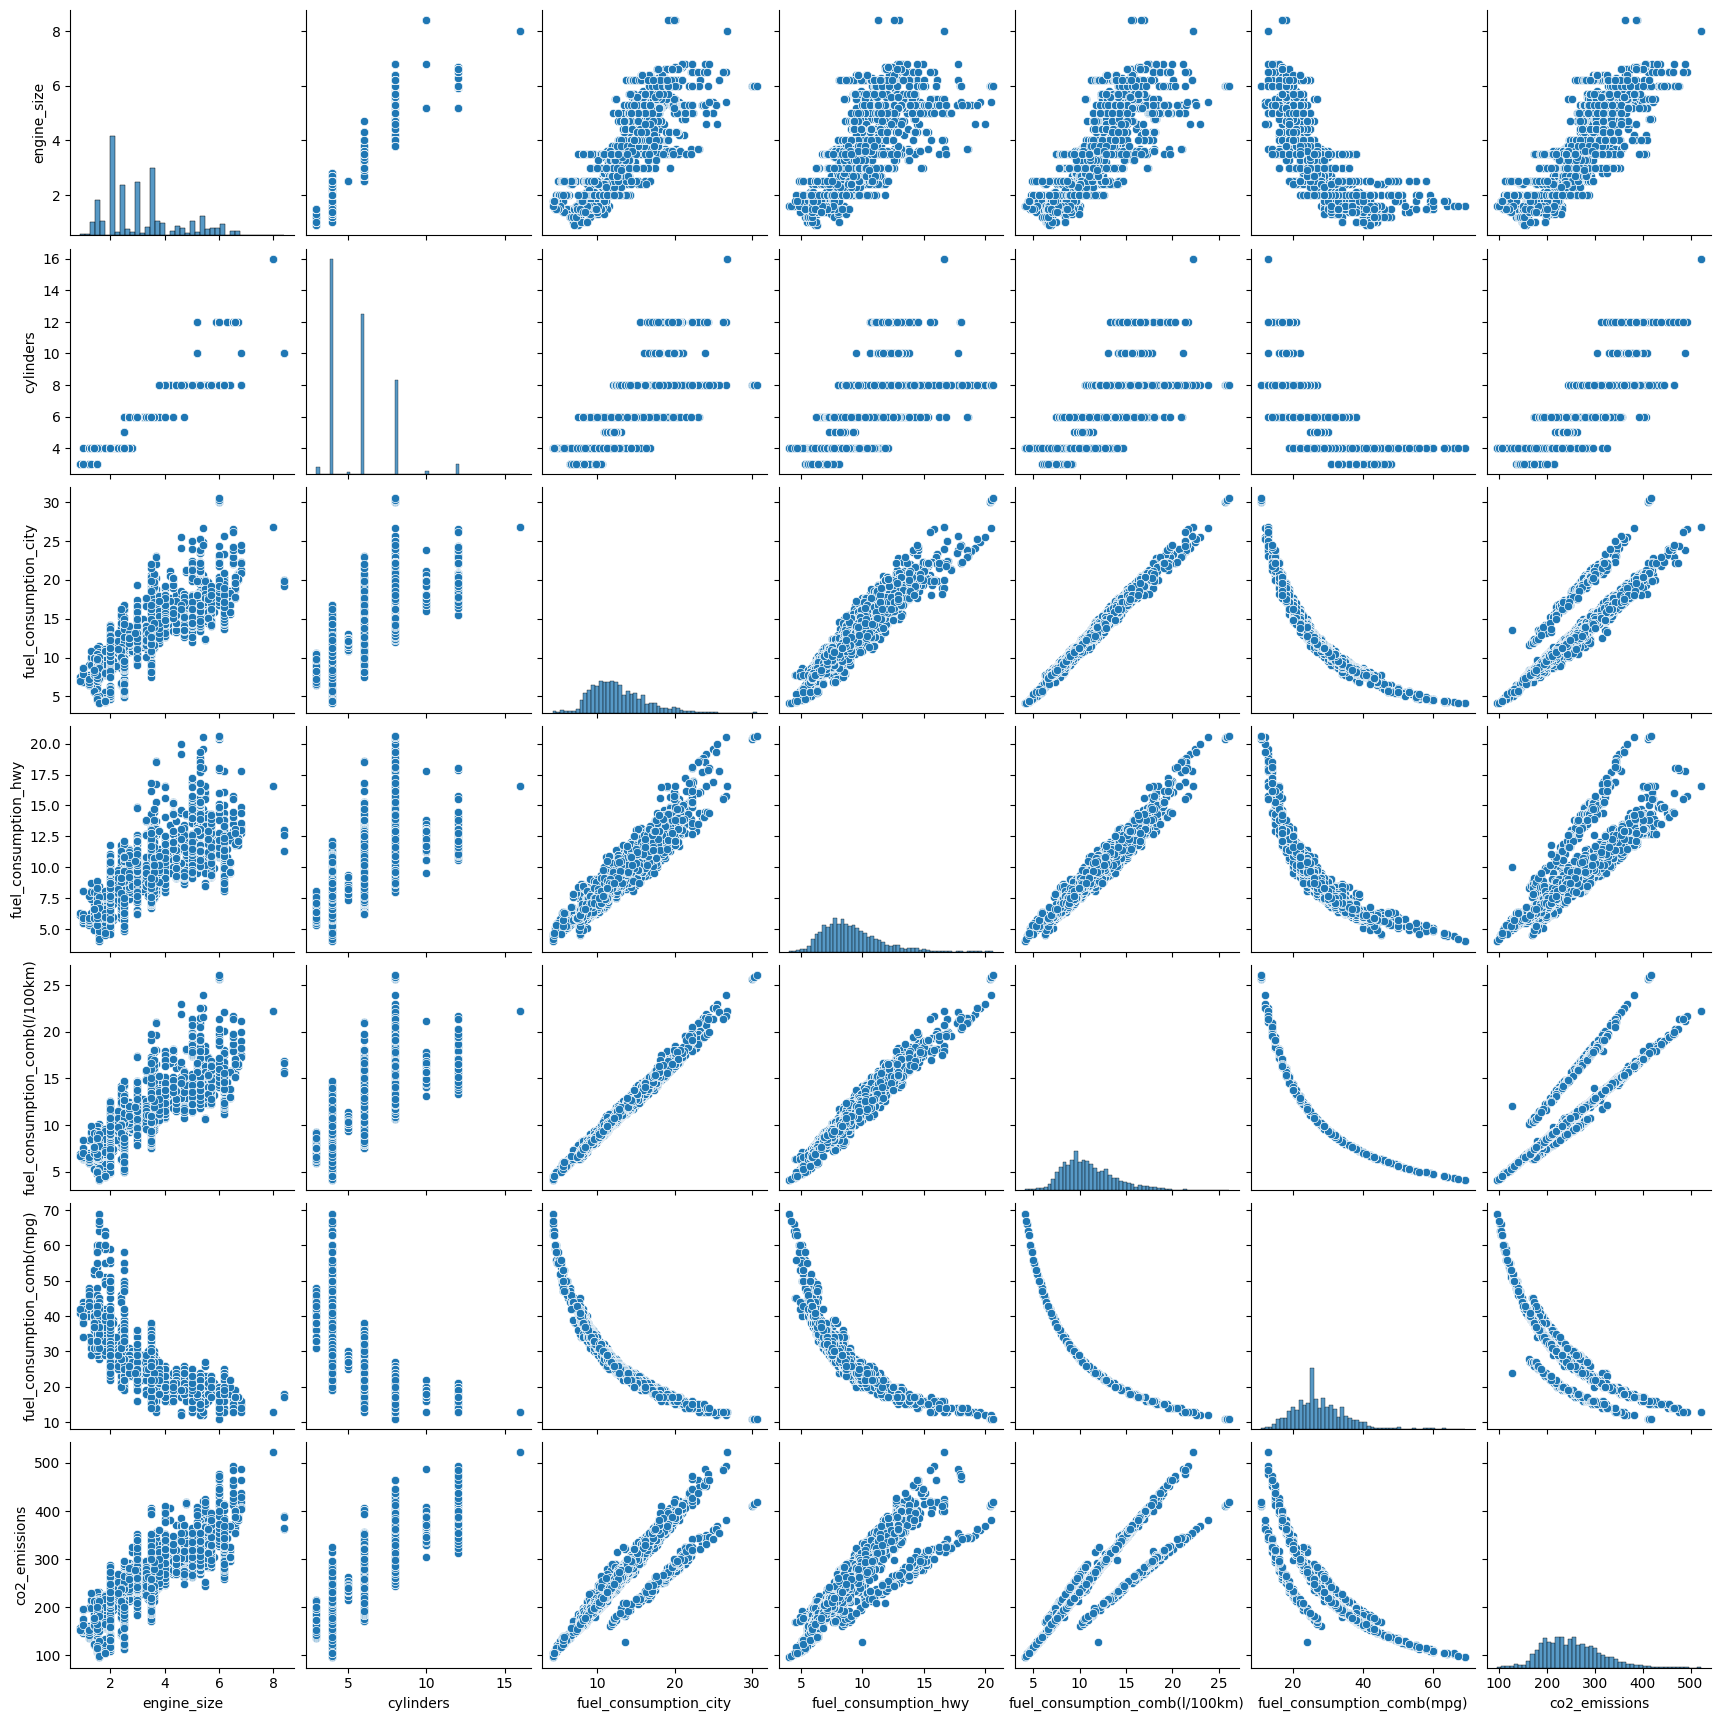

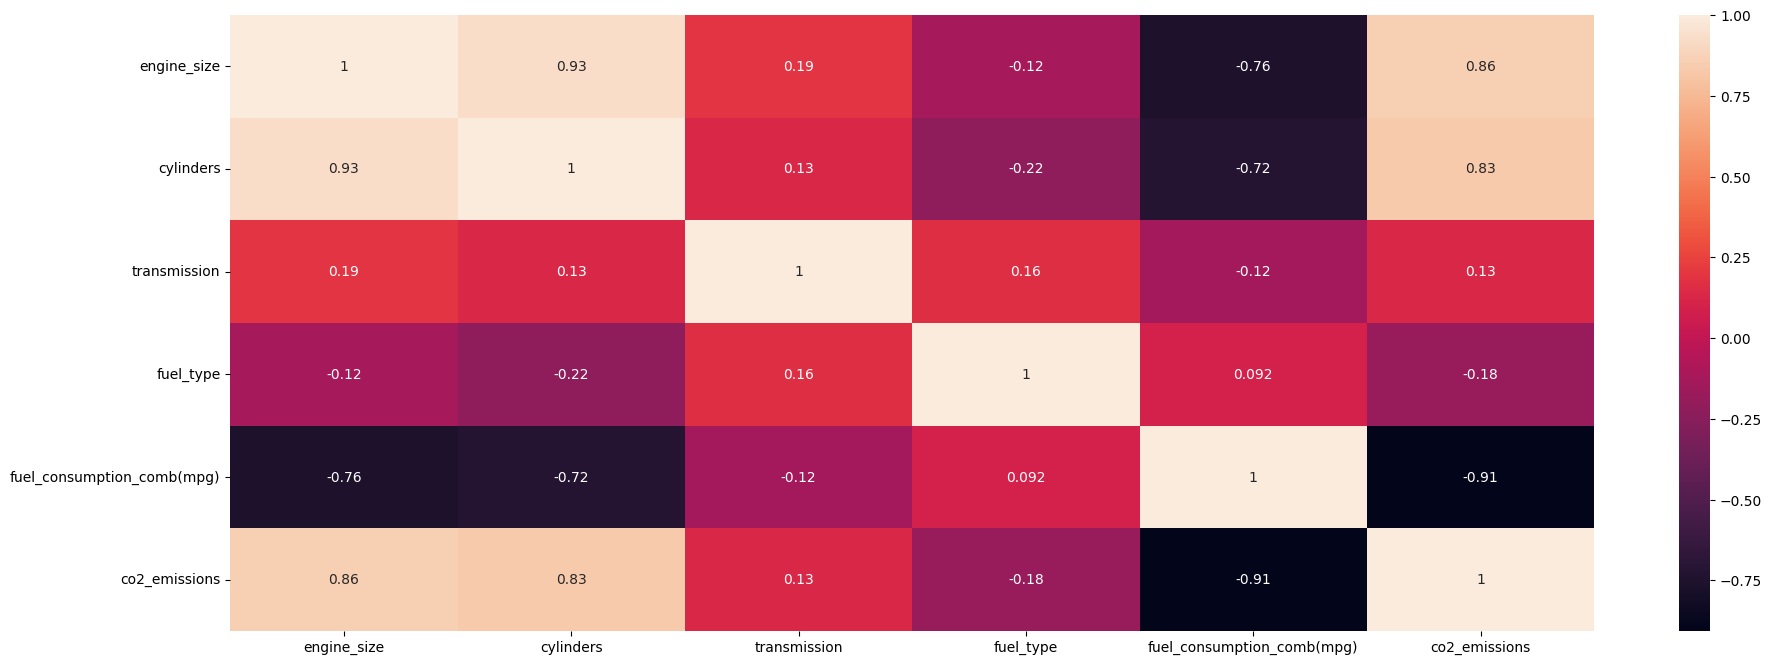

In [ ]:
#plot an heatmap for the correlation data
plt.figure(figsize=(22,8))
sns.heatmap(df_correlation.corr(), annot=True)
plt.show()

In [ ]:
sns.pairplot(df_correlation)

In [ ]:
##outliers


In [ ]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,0.0,1057.0,0.0,2.0,4,1,1,9.9,6.7,8.5,33,196
1,0.0,1057.0,0.0,2.4,4,2,1,11.2,7.7,9.6,29,221
2,0.0,1058.0,0.0,1.5,4,3,1,6.0,5.8,5.9,48,136
3,0.0,1233.0,11.0,3.5,6,1,1,12.7,9.1,11.1,25,255
4,0.0,1499.0,11.0,3.5,6,1,1,12.1,8.7,10.6,27,244


In [ ]:
plt.figure(figsize=(20,6))
for i in enumerate(df_correlation):
    plt.subplot(2,4,i[0]+1)
    plt.title(i[1])
    plt.boxplot(df_correlation[i[1]])

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(df_correlation))

In [ ]:
#removing the outliers
df_new = df_correlation[(z < 1.9).all(axis=1)]
df_new.reset_index(drop=True,inplace = True)
df_new.head()

,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb(mpg),co2_emissions
0,-0.851787,-0.877665,-0.931419,-1.08784,0.775640,196
1,-0.558808,-0.877665,-0.329103,-1.08784,0.222018,221
2,0.246886,0.205514,-0.931419,-1.08784,-0.331604,255
3,0.246886,0.205514,-0.931419,-1.08784,-0.054793,244
4,0.246886,0.205514,-0.931419,-1.08784,0.083613,230


In [ ]:
print("The length of the original : " , len(df))
print("The length after removing the outliers : " , len(df_new))
print("We just Removed",len(df)-len(df_new),"Outliers")

The length of the original :  6272
The length after removing the outliers :  5572
We just Removed 700 Outliers


In [ ]:
plt.figure(figsize = (20,10))
for i in enumerate(df_new):
    plt.subplot(2,4,i[0]+1)
    plt.title(i[1])
    plt.boxplot(df_new[i[1]])

In [ ]:
#with outliers
df.describe().T

,count,mean,std,min,25%,50%,75%,max
make,6272.0,19.466677,11.440771,0.0,9.00,17.0,29.0,41.0
model,6272.0,1023.289860,577.884122,0.0,531.75,990.5,1526.0,2052.0
vehicle_class,6272.0,6.335619,4.829158,0.0,2.00,6.0,11.0,15.0
engine_size,6272.0,3.162930,1.365392,0.9,2.00,3.0,3.7,8.4
cylinders,6272.0,5.620536,1.846565,3.0,4.00,6.0,6.0,16.0
fuel_consumption_city,6272.0,12.615179,3.550705,4.2,10.10,12.1,14.7,30.6
fuel_consumption_hwy,6272.0,9.073358,2.278068,4.0,7.50,8.7,10.3,20.6
fuel_consumption_comb(l/100km),6272.0,11.021843,2.945187,4.1,8.90,10.6,12.7,26.1
fuel_consumption_comb(mpg),6272.0,27.395886,7.225727,11.0,22.00,27.0,32.0,69.0
co2_emissions,6272.0,251.253348,59.238150,96.0,208.00,246.0,289.0,522.0


In [ ]:
#without outliers
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,5572.0,-0.147548,0.815265,-1.657481,-0.851787,-0.119338,0.320131,1.858274
cylinders,5572.0,-0.142359,0.798176,-1.419254,-0.877665,0.205514,0.205514,1.288692
transmission,5572.0,-0.044268,0.994668,-0.931419,-0.931419,-0.329103,0.875529,1.477844
fuel_type,5572.0,0.033558,0.995962,-1.087840,-1.087840,0.808209,0.808209,1.756233
fuel_consumption_comb(mpg),5572.0,0.014559,0.787967,-1.854063,-0.608414,-0.054793,0.498829,1.882883
co2_emissions,5572.0,244.970567,45.955297,157.000000,209.000000,242.000000,279.000000,363.000000


In [ ]:
# Add the df_new in a dataframe
sample_df = df_new.sample(n=200,random_state=35)
sample_df.head()

,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb(mpg),co2_emissions
948,-0.851787,-0.877665,-0.931419,-1.087840,0.637234,205
1841,0.906090,1.288692,0.875529,-1.087840,-1.162036,344
2603,0.320131,0.205514,1.477844,1.756233,-1.577252,296
3192,-0.851787,-0.877665,-0.931419,-0.139815,1.882883,186
4117,-0.851787,-0.877665,-0.329103,-1.087840,0.498829,210


In [ ]:
indexs = sample_df.index
indexs

Index([ 948, 1841, 2603, 3192, 4117, 2898, 2332, 4943, 3025, 2205,
       ...
       4487, 2783, 5013, 2466, 3641,  817, 4024,  211, 4357, 2768],
      dtype='int64', length=200)

In [ ]:
# we have to drop the sample dataframes
for i in indexs:
    df_new.drop(i, axis = 0,inplace = True)

In [ ]:
df_new.head()

,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb(mpg),co2_emissions
0,-0.851787,-0.877665,-0.931419,-1.08784,0.775640,196
1,-0.558808,-0.877665,-0.329103,-1.08784,0.222018,221
2,0.246886,0.205514,-0.931419,-1.08784,-0.331604,255
3,0.246886,0.205514,-0.931419,-1.08784,-0.054793,244
4,0.246886,0.205514,-0.931419,-1.08784,0.083613,230


In [ ]:
sample_df_x = sample_df.drop(['co2_emissions'],axis=1)
sample_df_y = sample_df['co2_emissions']

In [ ]:
new = sample_df_x.astype(np.float32)
sample_df_x = (new - np.min(new)) / (np.max(new) - np.min(new))
sample_df_x['engine_size'] = sample_df_x['engine_size'].map(lambda x:round(x,2))
sample_df_x['cylinders']=sample_df_x["cylinders"].map(lambda x:round(x,2))
sample_df_x['transmission']=sample_df_x["transmission"].map(lambda x:round(x,2))
sample_df_x['fuel_type']=sample_df_x["fuel_type"].map(lambda x:round(x,2))
sample_df_x['fuel_consumption_comb(mpg)']=sample_df_x['fuel_consumption_comb(mpg)'].map(lambda x:round(x,2))
sample_df_x.head()


,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb(mpg)
948,0.24,0.23,0.22,0.17,0.65
1841,0.73,0.83,0.72,0.17,0.15
2603,0.57,0.53,0.89,0.96,0.04
3192,0.24,0.23,0.22,0.44,1.00
4117,0.24,0.23,0.39,0.17,0.62


In [ ]:
## NORMALIZATION
X = df_new.drop(['co2_emissions'], axis= 1).astype(np.float32)
y = df_new['co2_emissions'].astype(np.float32)

In [ ]:
X = (X - np.min(X)) / (np.max(X) - np.min(X))

In [ ]:
X['engine_size']=X['engine_size'].map(lambda x:round(x,2))
X["cylinders"]=X["cylinders"].map(lambda x:round(x,2))
X['fuel_type']=X['fuel_type'].map(lambda x:round(x,2))
X['transmission']=X['transmission'].map(lambda x:round(x,2))
X['fuel_consumption_comb(mpg)']=X['fuel_consumption_comb(mpg)'].map(lambda x:round(x,2))


In [ ]:
X.head()

,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb(mpg)
0,0.27,0.26,0.25,0.21,0.70
1,0.35,0.26,0.41,0.21,0.56
2,0.56,0.55,0.25,0.21,0.41
3,0.56,0.55,0.25,0.21,0.48
4,0.56,0.55,0.25,0.21,0.52


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

print("X Train",X_train.shape)
print("Y Train",y_train.shape)
print("X test", X_test.shape)
print("y_test", y_test.shape)

X Train (4297, 5)
Y Train (4297,)
X test (1075, 5)
y_test (1075,)


MODEL BUILDING

In [ ]:
#importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

def train_linear_model(X_train, y_train):
    model = LinearRegression().fit(X_train, y_train)
    return model

def evaluate_linear(model, X_train, y_train, X_test, y_test):
    train_rmse_linear = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse_linear = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train_linear = model.score(X_train, y_train)
    lin_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse_linear, test_rmse_linear, r2_train_linear, lin_r2_score

def predict_compare(model, sample_df_x, sample_df_y):
    pred = model.predict(sample_df_x)
    result_pred = pd.DataFrame({"Pred_linear": pred, "Real Value": sample_df_y.values})
    result_pred["Pred_linear"] = result_pred["Pred_linear"].round(2)
    result_pred["Diff"] = result_pred["Pred_linear"] - result_pred["Real Value"]
    mean_diff_linear = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff_linear

if __name__ == "__main__":

    model = train_linear_model(X_train, y_train)
    train_rmse_linear, test_rmse_linear, r2_train_linear, lin_r2_score = evaluate_linear(model, X_train, y_train, X_test, y_test)

    print("Training Root Mean Squared Error with Linear Regression:", train_rmse_linear)
    print("Test Root Mean Squared Error with Linear Regression:", test_rmse_linear)
    print("R^2 score on training data with Linear Regression:", r2_train_linear)
    print("Cross Validation R^2 score with Linear Regression:", lin_r2_score)

    linear_regression_pred, mean_diff_linear = predict_compare(model, sample_df_x, sample_df_y)
    print("Mean difference between predicted and actual values:", mean_diff_linear)
    print("Predictions and actual values:\n", linear_regression_pred)


Training Root Mean Squared Error with Linear Regression: 15.357404797308785
Test Root Mean Squared Error with Linear Regression: 15.00208128450755
R^2 score on training data with Linear Regression: 0.8874404799907158
Cross Validation R^2 score with Linear Regression: 0.886707519494626
Mean difference between predicted and actual values: 11.12755
Predictions and actual values:
      Pred_linear  Real Value   Diff
0         215.11         205  10.11
1         322.26         344 -21.74
2         315.13         296  19.13
3         155.55         186 -30.45
4         219.50         210   9.50
..           ...         ...    ...
195       227.32         228  -0.68
196       251.46         269 -17.54
197       339.56         294  45.56
198       219.85         214   5.85
199       281.75         285  -3.25

[200 rows x 3 columns]


In [ ]:
linear_regression_pred.skew()

Pred_linear   -0.120006
Real Value     0.229282
Diff           0.667657
dtype: float64

In [ ]:
print(linear_regression_pred.describe())

       Pred_linear  Real Value        Diff
count    200.00000  200.000000  200.000000
mean     253.09095  249.670000    3.420950
std       42.46029   43.352373   15.149828
min      152.61000  163.000000  -36.380000
25%      219.76250  212.000000   -4.370000
50%      256.76500  248.000000    3.475000
75%      281.48750  284.000000    9.915000
max      339.56000  360.000000   58.250000


In [ ]:
linear_regression_pred.head(10)

,Pred_linear,Real Value,Diff
0,215.11,205,10.11
1,322.26,344,-21.74
2,315.13,296,19.13
3,155.55,186,-30.45
4,219.50,210,9.50
5,276.67,285,-8.33
6,327.70,356,-28.30
7,244.42,226,18.42
8,275.94,293,-17.06
9,275.48,295,-19.52


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

def train_random_forest(X_train, y_train):
    model = RandomForestRegressor().fit(X_train, y_train)
    return model

def evaluate_random(model, X_train, y_train, X_test, y_test):
    train_rsme_rf = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rsme_rf = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train_rf = r2_score(y_train, model.predict(X_train))
    rf_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rsme_rf, test_rsme_rf, r2_train_rf, rf_r2_score

def predict_compare(model, sample_df_x, sample_df_y):
    pred = model.predict(sample_df_x)
    result_pred = pd.DataFrame({"RF_pred": pred, "Real Value": sample_df_y.values})
    result_pred["RF_pred"] = result_pred["RF_pred"].round(2)
    result_pred["Diff"] = result_pred["RF_pred"] - result_pred["Real Value"]
    mean_diff_rf = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff_rf

if __name__ == "__main__":

    model = train_random_forest(X_train, y_train)
    train_rsme_rf, test_rsme_rf, r2_score_rf, rf_r2_score = evaluate_random(model, X_train, y_train, X_test, y_test)

    print("Training Root Mean Squared Error with Random Forest:", train_rsme_rf)
    print("Test Root Mean Squared Error with Random Forest:", test_rsme_rf)
    print("R^2 score on training data with Random Forest:", r2_score_rf)
    print("Cross Validation R^2 score with Random Forest:", rf_r2_score)

    random_forest_pred, mean_diff_rf = predict_compare(model, sample_df_x, sample_df_y)
    print("Mean difference between predicted and actual values:", mean_diff_rf)
    print("Predictions and actual values:\n", random_forest_pred)


Training Root Mean Squared Error with Random Forest: 3.338501087670315
Test Root Mean Squared Error with Random Forest: 4.3019247672416485
R^2 score on training data with Random Forest: 0.9946807596657736
Cross Validation R^2 score with Random Forest: 0.9912098282877195
Mean difference between predicted and actual values: 8.391350000000001
Predictions and actual values:
      RF_pred  Real Value   Diff
0     212.62         205   7.62
1     357.84         344  13.84
2     312.73         296  16.73
3     184.88         186  -1.12
4     210.70         210   0.70
..       ...         ...    ...
195   227.71         228  -0.29
196   272.82         269   3.82
197   331.98         294  37.98
198   212.62         214  -1.38
199   297.60         285  12.60

[200 rows x 3 columns]


In [ ]:
random_forest_pred.skew()

RF_pred       0.189478
Real Value    0.229282
Diff          0.848759
dtype: float64

In [ ]:
random_forest_pred.describe()

,RF_pred,Real Value,Diff
count,200.000000,200.000000,200.000000
mean,257.185850,249.670000,7.515850
std,48.688886,43.352373,8.440711
min,162.420000,163.000000,-7.200000
25%,212.920000,212.000000,1.105000
50%,258.370000,248.000000,5.320000
75%,295.355000,284.000000,12.945000
max,359.380000,360.000000,37.980000


In [ ]:

random_forest_pred.head(10)

,RF_pred,Real Value,Diff
0,212.62,205,7.62
1,357.84,344,13.84
2,312.73,296,16.73
3,184.88,186,-1.12
4,210.70,210,0.70
5,294.42,285,9.42
6,354.72,356,-1.28
7,228.63,226,2.63
8,294.42,293,1.42
9,295.33,295,0.33


 KNN REGRESSION MODEL

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

def knn_model(X_train, y_train):
    model = KNeighborsRegressor().fit(X_train, y_train)
    return model

def evaluate_knn(model, X_train, y_train, X_test, y_test):
    train_rmse_knn = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse_knn = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train_knn = r2_score(y_train, model.predict(X_train))
    knn_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse_knn, test_rmse_knn, r2_train_knn, knn_r2_score

def predict_compare(model, sample_df_x, sample_df_y):
    pred = model.predict(sample_df_x)
    result_pred = pd.DataFrame({"Pred_knn": pred, "Real Value": sample_df_y.values})
    result_pred["Pred_knn"] = result_pred["Pred_knn"].round(2)
    result_pred["Diff"] = result_pred["Pred_knn"] - result_pred["Real Value"]
    mean_diff_knn = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff_knn

if __name__ == "__main__":

    model = knn_model(X_train, y_train)
    train_rmse_knn, test_rmse_knn, r2_train_knn, knn_r2_score = evaluate_knn(model, X_train, y_train, X_test, y_test)

    print("Training Root Mean Squared Error with KNN model:", train_rmse_knn)
    print("Test Root Mean Squared Error with KNN model:", test_rmse_knn)
    print("R^2 score on training set with KNN model:", r2_train_knn)
    print("Cross-validation R^2 score with KNN model:", knn_r2_score)

    knn_model_pred, mean_diff_knn = predict_compare(model, sample_df_x, sample_df_y)
    print("Mean difference between predicted and actual values:", mean_diff_knn)
    print("Predictions and actual values:\n", knn_model_pred)


Training Root Mean Squared Error with KNN model: 4.4145794
Test Root Mean Squared Error with KNN model: 5.0292797
R^2 score on training set with KNN model: 0.9906990953167588
Cross-validation R^2 score with KNN model: 0.9855819791936419
Mean difference between predicted and actual values: 7.272999267578125
Predictions and actual values:
        Pred_knn  Real Value       Diff
0    208.399994         205   3.399994
1    341.399994         344  -2.600006
2    284.000000         296 -12.000000
3    189.000000         186   3.000000
4    210.399994         210   0.399994
..          ...         ...        ...
195  227.800003         228  -0.199997
196  264.399994         269  -4.600006
197  326.600006         294  32.600006
198  213.199997         214  -0.800003
199  299.000000         285  14.000000

[200 rows x 3 columns]


In [ ]:
knn_model_pred.skew()

Pred_knn      0.155304
Real Value    0.229282
Diff          0.580709
dtype: float64

 KNN WITH HYPERPARAMETER TUNING

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

def knn_class_model(X_train, y_train):
    model = KNeighborsClassifier().fit(X_train, y_train)
    return model

def evaluate_knn_class(model, X_train, y_train, X_test, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    knnclass_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy").mean()
    return train_accuracy, test_accuracy, knnclass_accuracy

def predict_compare(model, sample_df_x, sample_df_y):
    pred = model.predict(sample_df_x)
    result_pred = pd.DataFrame({"Pred_KNNclass": pred, "Real Value": sample_df_y.values})
    result_pred["Pred_KNNclass"] = result_pred["Pred_KNNclass"].round(2)
    result_pred["Diff"] = result_pred["Pred_KNNclass"] - result_pred["Real Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

if __name__ == "__main__":

    model = knn_class_model(X_train, y_train)
    train_accuracy, test_accuracy, knnclass_accuracy = evaluate_knn_class(model, X_train, y_train, X_test, y_test)

    print("Training Accuracy with KNN classification model :", train_accuracy)
    print("Test Accuracy with KNN classification model :", test_accuracy)
    print("R^2 score on training set with KNN model:", r2_train)
    print("Cross-validation Accuracy with KNN classification model :", knnclass_r2_score)

    knnclass_model_pred , mean_diff = predict_compare(model, sample_df_x, sample_df_y)
    print("Mean difference between predicted and actual values:", mean_diff)
    print("Predictions and actual values:\n", knnclass_model_pred)


Training Accuracy with KNN classification model : 0.3158017221317198
Test Accuracy with KNN classification model : 0.16465116279069766
R^2 score on training set with KNN model: 0.9906990953167588
Cross-validation Accuracy with KNN classification model : 0.9706343745621053
Mean difference between predicted and actual values: 7.455
Predictions and actual values:
      Pred_KNNclass  Real Value  Diff
0            209.0         205   4.0
1            338.0         344  -6.0
2            269.0         296 -27.0
3            184.0         186  -2.0
4            210.0         210   0.0
..             ...         ...   ...
195          228.0         228   0.0
196          260.0         269  -9.0
197          306.0         294  12.0
198          216.0         214   2.0
199          301.0         285  16.0

[200 rows x 3 columns]


SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

def svr_model(X_train, y_train):
    model = SVR().fit(X_train, y_train)
    return model

def evaluate_svr(model, X_train, y_train, X_test, y_test):
    train_rmse_svr = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse_svr = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train_svr = r2_score(y_train, model.predict(X_train))
    svr_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse_svr, test_rmse_svr, r2_train_svr, svr_r2_score

def predict_compare(model, sample_df_x, sample_df_y):
    pred = model.predict(sample_df_x)
    result_pred = pd.DataFrame({"Pred_svr": pred, "Real Value": sample_df_y.values})
    result_pred["Pred_svr"] = result_pred["Pred_svr"].round(2)
    result_pred["Diff"] = result_pred["Pred_svr"] - result_pred["Real Value"]
    mean_diff_svr = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff_svr

if __name__ == "__main__":

    model = svr_model(X_train, y_train)
    train_rmse_svr, test_rmse_svr, r2_train_svr, svr_r2_score = evaluate_svr(model, X_train, y_train, X_test, y_test)

    print("Training Root Mean Squared Error with SVR model:", train_rmse_svr)
    print("Test Root Mean Squared Error with SVR model:", test_rmse_svr)
    print("R^2 score on training set with SVR model:", r2_train_svr)
    print("Cross-validation R^2 score with SVR model:", svr_r2_score)

    svr_model_pred, mean_diff_svr = predict_compare(model, sample_df_x, sample_df_y)
    print("Mean difference between predicted and actual values:", mean_diff_svr)
    print("Predictions and actual values:\n", svr_model_pred)


Training Root Mean Squared Error with SVR model: 10.706313611007715
Test Root Mean Squared Error with SVR model: 10.63372980501613
R^2 score on training set with SVR model: 0.945295067024582
Cross-validation R^2 score with SVR model: 0.9406144924211874
Mean difference between predicted and actual values: 7.50995
Predictions and actual values:
      Pred_svr  Real Value   Diff
0      211.10         205   6.10
1      318.48         344 -25.52
2      274.82         296 -21.18
3      175.59         186 -10.41
4      212.93         210   2.93
..        ...         ...    ...
195    232.07         228   4.07
196    260.46         269  -8.54
197    294.88         294   0.88
198    215.95         214   1.95
199    282.19         285  -2.81

[200 rows x 3 columns]


COMPARISON TABLE

LASSO AND RIDGE REGRESSIONS

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

def lasso_model(X_train, y_train):
    model = Lasso().fit(X_train, y_train)
    return model

def evaluate_lasso(model, X_train, y_train, X_test, y_test):
    train_rmse_lasso = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse_lasso = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train_lasso = r2_score(y_train, model.predict(X_train))
    lasso_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse_lasso, test_rmse_lasso, r2_train_lasso, lasso_r2_score

def predict_compare(model, sample_df_x, sample_df_y):
    pred = model.predict(sample_df_x)
    result_pred = pd.DataFrame({"Pred_lasso": pred, "Real Value": sample_df_y.values})
    result_pred["Pred_lasso"] = result_pred["Pred_lasso"].round(2)
    result_pred["Diff"] = result_pred["Pred_lasso"] - result_pred["Real Value"]
    mean_diff_lasso = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff_lasso

if __name__ == "__main__":

    model = lasso_model(X_train, y_train)
    train_rmse_lasso, test_rmse_lasso, r2_train_lasso, lasso_r2_score = evaluate_lasso(model, X_train, y_train, X_test, y_test)

    print("Training Root Mean Squared Error with Lasso regression model:", train_rmse_lasso)
    print("Test Root Mean Squared Error with Lasso regression model:", test_rmse_lasso)
    print("R^2 score on training set with Lasso regression model:", r2_train_lasso)
    print("Lasso regression model accuracy (R^2 score) via cross-validation:", lasso_r2_score)

    lasso_model_pred, mean_diff_lasso = predict_compare(model, sample_df_x, sample_df_y)
    print("Mean difference between predicted and actual values:", mean_diff_lasso)
    print("Predictions and actual values:\n", lasso_model_pred)


Training Root Mean Squared Error with Lasso regression model: 16.641599695583494
Test Root Mean Squared Error with Lasso regression model: 16.400015498317128
R^2 score on training set with Lasso regression model: 0.8678288370979097
Lasso regression model accuracy (R^2 score) via cross-validation: 0.8672938176984575
Mean difference between predicted and actual values: 11.144549999999999
Predictions and actual values:
      Pred_lasso  Real Value   Diff
0        213.50         205   8.50
1        310.24         344 -33.76
2        314.65         296  18.65
3        163.47         186 -22.53
4        217.79         210   7.79
..          ...         ...    ...
195      230.88         228   2.88
196      253.03         269 -15.97
197      334.69         294  40.69
198      217.79         214   3.79
199      273.94         285 -11.06

[200 rows x 3 columns]


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

def ridge_model(X_train, y_train):
    model = Ridge()
    model.fit(X_train, y_train)
    return model

def evaluate_ridge(model, X_train, y_train, X_test, y_test):
    train_rmse_ridge = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse_ridge = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train_ridge = r2_score(y_train, model.predict(X_train))
    ridge_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse_ridge, test_rmse_ridge, r2_train_ridge, ridge_r2_score

def predict_compare(model, sample_df_x, sample_df_y):
    pred = model.predict(sample_df_x)
    result_pred = pd.DataFrame({"Pred_ridge": pred, "Real Value": sample_df_y.values})
    result_pred["Pred_ridge"] = result_pred["Pred_ridge"].round(2)
    result_pred["Diff"] = result_pred["Pred_ridge"] - result_pred["Real Value"]
    mean_diff_ridge = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff_ridge

if __name__ == "__main__":
    model = ridge_model(X_train, y_train)
    train_rmse_ridge, test_rmse_ridge, r2_train_ridge, ridge_r2_score = evaluate_ridge(model, X_train, y_train, X_test, y_test)

    print("Training Root Mean Squared Error with Ridge regression model:", train_rmse_ridge)
    print("Test Root Mean Squared Error with Ridge regression model:", test_rmse_ridge)
    print("R^2 score on training set with Ridge regression model:", r2_train_ridge)
    print("Ridge regression model accuracy (R^2 score) via cross-validation:", ridge_r2_score)

    ridge_model_pred, mean_diff_ridge = predict_compare(model, sample_df_x, sample_df_y)
    print("Mean difference between predicted and actual values:", mean_diff_ridge)
    print("Predictions and actual values:\n", ridge_model_pred)


Training Root Mean Squared Error with Ridge regression model: 15.359437293388336
Test Root Mean Squared Error with Ridge regression model: 15.00004972806658
R^2 score on training set with Ridge regression model: 0.8874106843416413
Ridge regression model accuracy (R^2 score) via cross-validation: 0.8866773953935345
Mean difference between predicted and actual values: 11.115849999999998
Predictions and actual values:
      Pred_ridge  Real Value   Diff
0        215.01         205  10.01
1        322.03         344 -21.97
2        314.47         296  18.47
3        156.16         186 -29.84
4        219.35         210   9.35
..          ...         ...    ...
195      227.15         228  -0.85
196      250.95         269 -18.05
197      339.25         294  45.25
198      219.69         214   5.69
199      281.39         285  -3.61

[200 rows x 3 columns]


In [ ]:
pip install tabulate

In [ ]:
import pandas as pd
from tabulate import tabulate


models = ["Linear Regression", "Random Forest", "KNN Regression", "SVR", "Lasso Regression", "Ridge Regression"]
train_rmse = [train_rmse_linear, train_rsme_rf, train_rmse_knn, train_rmse_svr, train_rmse_lasso, train_rmse_ridge]
test_rmse = [test_rmse_linear, test_rsme_rf, test_rmse_knn, test_rmse_svr, test_rmse_lasso, test_rmse_ridge]
r2_score_train = [r2_train_linear, r2_score_rf, r2_train_knn, r2_train_svr, r2_train_lasso, r2_train_ridge]
cross_val_r2 = [lin_r2_score, rf_r2_score, knn_r2_score, svr_r2_score, lasso_r2_score, ridge_r2_score]
mean_difference = [mean_diff_linear, mean_diff_rf, mean_diff_knn, mean_diff_svr, mean_diff_lasso, mean_diff_ridge]

# Creating the dictionary for DataFrame
data = {
    "Model": models,
    "Training RMSE": train_rmse,
    "Test RMSE": test_rmse,
    "R² Score (Training)": r2_score_train,
    "Cross-validated R²": cross_val_r2,
    "Mean Difference": mean_difference
}

# Creating the DataFrame
results_df = pd.DataFrame(data)

# Print the table using tabulate
table = tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False)

# Print the formatted table
print(table)


+-------------------+--------------------+--------------------+---------------------+--------------------+--------------------+
|       Model       |   Training RMSE    |     Test RMSE      | R² Score (Training) | Cross-validated R² |  Mean Difference   |
+-------------------+--------------------+--------------------+---------------------+--------------------+--------------------+
| Linear Regression | 15.357404797308785 | 15.00208128450755  | 0.8874404799907158  | 0.886707519494626  |      11.12755      |
|   Random Forest   | 3.338501087670315  | 4.3019247672416485 | 0.9946807596657736  | 0.9912098282877195 | 8.391350000000001  |
|  KNN Regression   | 4.414579391479492  | 5.029279708862305  | 0.9906990953167588  | 0.9855819791936419 | 7.272999267578125  |
|        SVR        | 10.706313611007715 | 10.63372980501613  |  0.945295067024582  | 0.9406144924211874 |      7.50995       |
| Lasso Regression  | 16.641599695583494 | 16.400015498317128 | 0.8678288370979097  | 0.8672938176984575

In [ ]:
df

,Model,Accuracy Score
0,Linear Regression,0.886708
1,Random Forest,0.991210
2,KNN,0.985582
3,KNN_hypertuning,0.970634
4,SVR,0.940614
5,Lasso,0.867294
6,Ridge,0.886677


In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10)

def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)
    return model.score(X_test_k, y_test_k)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

In [ ]:
scores = []

for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]

    scores.append(Get_score(RandomForestRegressor(), X_train_k, X_test_k, y_train_k, y_test_k))


print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4))
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.9909482862857716, 0.9909563666307949, 0.9919613517530097, 0.9923709942561518, 0.9907593604140966, 0.9918297079609538, 0.9896312890393955, 0.9901310849146568, 0.9925083983087729, 0.9912452032893312]

Minimum score obtained:  0.9896
Maximum score obtained:  0.9925
Average score obtained:  0.9912


In [ ]:
scores = cross_val_score(estimator = RandomForestRegressor(),
                         X = X_train,
                         y = y_train,
                         cv = 10,
                         scoring = 'r2')

print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4))
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.9910301  0.99093162 0.99208344 0.99220472 0.99082155 0.99181326
 0.9897623  0.99013269 0.99251773 0.99126217]

Minimum score obtained:  0.9898
Maximum score obtained:  0.9925
Average score obtained:  0.9913


In [ ]:
# saving the model
import pickle
pickle_out = open("randomforest.pkl", mode = "wb") #opened for writing in binary mode - mode wb
pickle.dump(RandomForestRegressor(), pickle_out)
pickle_out.close()

In [ ]:
pickle.format_version

'4.0'

In [ ]:
!pip install streamlit -q

In [ ]:
import os
import pickle
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor

# Load the training data
df = pd.read_csv('co2_emissions (1).csv')

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode 'transmission' column
df['transmission'] = label_encoder.fit_transform(df['transmission'])

# Encode 'fuel_type' column
df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])


# Split the data into features (X_train) and target variable (y_train)
X_train = df[['engine_size', 'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_comb(mpg)']]
y_train = df['co2_emissions']

randomforest = RandomForestRegressor()
randomforest.fit(X_train, y_train)

# Load the trained model
with open('randomforest.pkl', 'rb') as f:
    randomforest = pickle.load(f)

if hasattr(randomforest, 'estimators_'):
    print("Model is fitted.")
else:
    print("Model is not fitted. Fitting the model now...")
    # Split the data into features (X_train) and target variable (y_train)
    X_train = df[['engine_size', 'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_comb(mpg)']]
    y_train = df['co2_emissions']
    # Fit the model to the training data
    randomforest.fit(X_train, y_train)
    print("Model fitted successfully.")

# Function to predict CO2 emissions
def predict_co2_emissions(engine_size, cylinders, transmission, fuel_type, fuel_consumption):
    # Encode categorical variables
    transmission_mapping = {"Automatic": 0, "Manual": 1, "Automatic Select Shift": 2, "Continuously Variable": 3, "Automated Manual": 4}
    fuel_type_mapping = {"Regular Gasoline": 0, "Premium Gasoline": 1, "Diesel": 2, "Ethanol": 3, "Natural Gas": 4}
    transmission_encoded = transmission_mapping[transmission]
    fuel_type_encoded = fuel_type_mapping[fuel_type]
    # Make prediction
    input_data = [[engine_size, cylinders, transmission_encoded, fuel_type_encoded, fuel_consumption]]
    predicted_co2 = randomforest.predict(input_data)
    return predicted_co2[0]

# Define the plot_bar function outside of the main function
def plot_bar(data, x_label, y_label, title):
    plt.figure(figsize=(23, 5))
    fig = sns.barplot(data=data, x=x_label, y=y_label)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.bar_label(plt.gca().containers[0], fontsize=9)
    st.pyplot()

def main():
    css = """
    <style>
    body {
       background-image: url("background.jpg");
       background-size: cover;
    }
    .sidebar .sidebar-content {
       background-image: url("sidebar.jpg");
       background-size: cover;
    }
    </style>
    """

    # Display the CSS
    st.markdown(css, unsafe_allow_html=True)

    st.title("CO2 Emissions Predictor")

    # Sidebar
    st.set_option('deprecation.showPyplotGlobalUse', False)

    user_input = st.sidebar.selectbox('Please select', ('Project Details', 'Visualization', 'Prediction'))

    if user_input == 'Project Details':
        st.header("CO2 Emissions by Vehicle")
        st.subheader("CO2 Emissions")
        st.write("The main objective of the project is to model the CO2 emissions as a function of several car engine features. The data is as follows")
        st.write(df)
        st.write("The Description of Numerical Variables")
        st.write(df.describe(include=np.number))
        st.write("The Description of Categorical Variables")
        st.write(df.describe(include=object))

       # Box Plots-------------------------------------------------------------------------------------------
        st.header("Box Plots")

        st.subheader("Box Plots for Numerical Features")
        features = ['engine_size', 'cylinders', 'fuel_consumption_comb(mpg)', 'co2_emissions']

       # Adjust the layout based on the number of features
        num_features = len(features)
        num_rows = (num_features + 2) // 3
        num_cols = min(num_features, 3)

        plt.figure(figsize=(20, 10))

        for i, feature in enumerate(features, start=1):
            plt.subplot(num_rows, num_cols, i)
            plt.boxplot(df[feature])
            plt.title(feature)


        st.pyplot()

       # Calculate the IQR (Interquartile Range) for each feature
        Q1 = df[features].quantile(0.25)
        Q3 = df[features].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers from the DataFrame
        df_no_outliers = df[~((df[features] < lower_bound) | (df[features] > upper_bound)).any(axis=1)]

        # Print the number of data points before and after outlier removal
        st.write("Before removing outliers, we have", len(df), "data points.")
        st.write("After removing outliers, we have", len(df_no_outliers), "data points.")

        # Boxplot after removing outliers
        st.subheader("Boxplot after removing outliers")
        plt.figure(figsize=(20, 10))
        for i, feature in enumerate(features, start=1):
            plt.subplot(2, 2, i)
            plt.boxplot(df_no_outliers[feature])
            plt.title(feature)
        st.pyplot()


    elif user_input == 'Visualization':

        st.sidebar.subheader("Visualization Options")
        user_input = st.sidebar.selectbox('Please select', ('Brands of Cars', 'Model', 'Vehicle Class', 'Engine Size', 'Cylinders', 'Transmission', 'Fuel Type', 'Prediction'))

        def plot_bar(data, x_label, y_label, title):
            plt.figure(figsize=(23, 5))
            fig = sns.barplot(data=data, x=x_label, y=y_label)
            plt.xticks(rotation=90)
            plt.title(title)
            plt.xlabel(x_label)
            plt.ylabel(y_label)
            plt.bar_label(plt.gca().containers[0], fontsize=9)
            st.pyplot()

        # Brands of Cars-------------------------------------------------------------------------------------------
        if user_input == 'Brands of Cars':

            st.subheader('Brands of Cars')
            st.write("There are 42 unique brands of cars with with 20 brands owning fewer than 100 cars and ranging from 2 to 575 cars per brand.")
            df['make'] = df['make'].astype(str)
            df_brand = df['make'].value_counts().reset_index().rename(columns={'count': 'Count'})
            plt.figure(figsize=(15, 6))
            fig1 = sns.barplot(data=df_brand, x="make", y="Count")
            plt.xticks(rotation=75)
            plt.title("All Car Companies and their Cars")
            plt.xlabel("Companies")
            plt.ylabel("Cars")
            plt.bar_label(fig1.containers[0], fontsize=7)
            st.pyplot()
            st.write(df_brand)

            # CO2 Emission variation with Brand----------------------------------------------------------------------
            st.header('Variation in CO2 emissions with different features')
            st.subheader('CO2 Emission with Brand ')
            df_co2_make = df.groupby(['make'])['co2_emissions'].mean().sort_values().reset_index()
            plt.figure(figsize=(20, 5))
            fig9 = sns.barplot(data=df_co2_make, x="make", y="co2_emissions")
            plt.xticks(rotation=90)
            plt.title("CO2 Emissions variation with Brand")
            plt.xlabel("Brands")
            plt.ylabel("CO2 Emissions(g/km)")
            plt.bar_label(plt.gca().containers[0], fontsize=8, fmt='%.1f')
            st.pyplot()

            def plot_bar(data, x_label, y_label, title):
                plt.figure(figsize=(23, 5))
                fig10 = sns.barplot(data=data, x=x_label, y=y_label)
                plt.xticks(rotation=90)
                plt.title(title)
                plt.xlabel(x_label)
                plt.ylabel(y_label)
                plt.bar_label(plt.gca().containers[0], fontsize=9)
                st.pyplot()

        # Top 25 Models of Cars------------------------------------------------------------------------------------
        elif user_input == 'Model':
            st.subheader('Top 25 Models of Cars')
            st.write("There are 2053 unique models across the 42 brands. While 5 brands possess fewer than 10 cars and 5 brands have over 100, the majority of brands (32) have model counts between 10 and 100.")
            df_model = df['model'].value_counts().reset_index().rename(columns={'count': 'Count'})
            plt.figure(figsize=(20, 6))
            fig2 = sns.barplot(data=df_model[:25], x="model", y="Count")
            plt.xticks(rotation=75)
            plt.title("Top 25 Car Models")
            plt.xlabel("Models")
            plt.ylabel("Cars")
            plt.bar_label(fig2.containers[0])
            st.pyplot()
            st.write(df_model)

        # Vehicle Class--------------------------------------------------------------------------------------------
        elif user_input == 'Vehicle Class':
            st.subheader('Vehicle Class')
            st.write("We observe 16 distinct vehicle classes, with SUV-Small, Mid-size, and Compact being the most prevalent classes, each with over 900 cars.")
            df_vehicle_class = df['vehicle_class'].value_counts().reset_index().rename(columns={'count': 'Count'})
            plt.figure(figsize=(20, 5))
            fig3 = sns.barplot(data=df_vehicle_class, x="vehicle_class", y="Count")
            plt.xticks(rotation=75)
            plt.title("All Vehicle Class")
            plt.xlabel("Vehicle Class")
            plt.ylabel("Cars")
            plt.bar_label(fig3.containers[0])
            st.pyplot()
            st.write(df_vehicle_class)

            # CO2 Emissions variation with Vehicle Class-------------------------------------------------------------
            st.subheader('CO2 Emissions variation with Vehicle Class')
            df_co2_vehicle_class = df.groupby(['vehicle_class'])['co2_emissions'].mean().sort_values().reset_index()
            fig11 = plot_bar(df_co2_vehicle_class, "vehicle_class", "co2_emissions", "CO2 Emissions variation with Vehicle Class")
            st.pyplot()

        # Engine Sizes of Cars-------------------------------------------------------------------------------------
        elif user_input == 'Engine Size':
            st.subheader('Engine Sizes of Cars')
            st.write("There are 51 different engine sizes present, with 2-liter and 3-liter engines being the most common, while 2.2-liter and 5.8-liter engines are the least common.")
            df_engine_size = df['engine_size'].value_counts().reset_index().rename(columns={'count': 'Count'})
            plt.figure(figsize=(20, 6))
            fig4 = sns.barplot(data=df_engine_size, x="engine_size", y="Count")
            plt.xticks(rotation=90)
            plt.title("All Engine Sizes")
            plt.xlabel("Engine Size(L)")
            plt.ylabel("Cars")
            plt.bar_label(fig4.containers[0])
            st.pyplot()
            st.write(df_engine_size)

        # Cylinders-----------------------------------------------------------------------------------------------
        elif user_input == 'Cylinders':
            st.subheader('Cylinders')
            st.write("Our dataset features 8 different cylinder counts, ranging from 3 to 16 cylinders. The most common cylinder counts are 4 and 6, with 16 cylinders appearing only twice, notably in the Bugatti Chiron.")
            df_cylinders = df['cylinders'].value_counts().reset_index().rename(columns={'count': 'Count'})
            plt.figure(figsize=(20, 6))
            fig5 = sns.barplot(data=df_cylinders, x="cylinders", y="Count")
            plt.xticks(rotation=90)
            plt.title("All Cylinders")
            plt.xlabel("Cylinders")
            plt.ylabel("Cars")
            plt.bar_label(fig5.containers[0])
            st.pyplot()
            st.write(df_cylinders)

        # Transmission of Cars------------------------------------------------------------------------------------
        elif user_input == 'Transmission':
            transmission_mapping = {"A": "Automatic", "M": "Manual", "AS": "Automatic Select Shift", "AV": "Continuously Variable", "AM": "Automated Manual"}
            df["transmission"] = df["transmission"].map(transmission_mapping)
            st.subheader('Transmission')
            st.write("Five transmission types are represented in our dataset: Automatic Select shift is the most oftenly used, while Continuously Variable is the least common.")
            df_transmission = df['transmission'].value_counts().reset_index().rename(columns={'count': 'Count'})
            fig6 = plt.figure(figsize=(20, 5))
            sns.barplot(data=df_transmission, x="transmission", y="Count")
            plt.title("All Transmissions")
            plt.xlabel("Transmissions")
            plt.ylabel("Cars")
            plt.bar_label(plt.gca().containers[0])
            st.pyplot()
            st.write(df_transmission)

            def plot_bar(data, x_label, y_label, title):
                plt.figure(figsize=(23, 5))
                fig10 = sns.barplot(data=data, x=x_label, y=y_label)
                plt.xticks(rotation=90)
                plt.title(title)
                plt.xlabel(x_label)
                plt.ylabel(y_label)
                plt.bar_label(plt.gca().containers[0], fontsize=9)
                st.pyplot()

            # CO2 Emission variation with Transmission---------------------------------------------------------------
            st.subheader('CO2 Emission variation with Transmission')
            df_co2_transmission = df.groupby(['transmission'])['co2_emissions'].mean().sort_values().reset_index()
            fig12 = plot_bar(df_co2_transmission, "transmission", "co2_emissions", "CO2 Emission variation with Transmission")
            st.pyplot()

        # Fuel Type of Cars--------------------------------------------------------------------------------------
        elif user_input == 'Fuel Type':
            fuel_mapping = {"Z": "Premium Gasoline", "D": "Diesel", "X": "Regular Gasoline", "E": "Ethanol", "AM": "Natural Gas"}
            df["fuel_type"] = df["fuel_type"].map(fuel_mapping)
            st.subheader('Fuel Type')
            st.write("There are 5 fuel types: Regular Gasoline being the most common and Natural Gas being the least common..")
            df_fuel_type = df['fuel_type'].value_counts().reset_index().rename(columns={'count': 'Count'})
            plt.figure(figsize=(20, 5))
            fig7 = sns.barplot(data=df_fuel_type, x="fuel_type", y="Count")
            plt.title("All Fuel Types")
            plt.xlabel("Fuel Types")
            plt.ylabel("Cars")
            plt.bar_label(plt.gca().containers[0])
            st.pyplot()
            st.text("We have only one data on natural gas. So we cannot predict anything using only one data. That's why we have to drop this row.")
            st.write(df_fuel_type)


            # CO2 Emissions variation with Fuel Type--------------------------------------------------------------
            st.subheader('CO2 Emissions variation with Fuel Type')
            df_co2_fuel_type = df.groupby(['fuel_type'])['co2_emissions'].mean().sort_values().reset_index()
            fig13 = plot_bar(df_co2_fuel_type, "fuel_type", "co2_emissions", "CO2 Emissions variation with Fuel Type")
            st.pyplot()

    elif user_input == 'Prediction':
        st.header("CO2 Emission Prediction")
        st.write('Enter the vehicle specifications to predict CO2 emissions.')

        engine_size = st.number_input('Engine Size (L)', step=0.1)
        cylinders = st.number_input('Cylinders', min_value=2, max_value=16, step=1)
        transmission = st.selectbox('Transmission', ['Automatic', 'Manual', 'Automatic Select Shift', 'Continuously Variable', 'Automated Manual'])
        fuel_type = st.selectbox('Fuel Type', ['Regular Gasoline', 'Premium Gasoline', 'Diesel', 'Ethanol', 'Natural Gas'])
        fuel_consumption = st.number_input('Fuel Consumption (mpg)', step=0.1)

        if st.button('Predict CO2 Emissions'):
            predicted_co2 = predict_co2_emissions(engine_size, cylinders, transmission, fuel_type, fuel_consumption)
            st.write(f'Predicted CO2 Emissions: {predicted_co2:.2f} g/km')

if __name__ == "__main__":
  main()


Model is not fitted. Fitting the model now...


2024-05-24 06:32:34.886 
════════════════════════════════════════════════
deprecation.showPyplotGlobalUse IS NO LONGER SUPPORTED.

The support for global pyplot instances is planned to be removed soon.

Please update <user defined>.
════════════════════════════════════════════════

2024-05-24 06:32:34.931 Serialization of dataframe to Arrow table was unsuccessful due to: ("Could not convert 'FORD' with type str: tried to convert to int64", 'Conversion failed for column make with type object'). Applying automatic fixes for column types to make the dataframe Arrow-compatible.


Model fitted successfully.


In [ ]:
! wget -q -O - ipv4.icanhazip.com

35.229.154.162


In [ ]:
!streamlit run emissions.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.229.154.162:8501

npx: installed 22 in 2.825s
your url is: https://late-hounds-press.loca.lt
